In [1]:
#### Set up the libraries needed to import data
import pandas as pd
import numpy as np

from pathlib import Path


from scipy import stats
from collections import Counter

from PIL import Image  
import PIL


import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import DBSCAN

import seaborn as sns

from scipy import ndimage

import scipy.spatial.distance

from matplotlib.gridspec import GridSpec

In [2]:
# set up file names
path = "C:\\Users\\fallest\\Google Drive\\Imperial Paper\\data\\"
file_142 = "data_142.csv"
file_147 = "data_147.csv"
file_182 = "data_182.csv"
file_192 = "data_192.csv"


file_200 = "data_200.csv"
file_208 = "data_208.csv"
file_218 = "data_218.csv"
file_219 = "data_219.csv"

In [3]:
#read in data as dataframes
data_142 = pd.read_csv(path+file_142)
data_147 = pd.read_csv(path+file_147)
data_182 = pd.read_csv(path+file_182)
data_192 = pd.read_csv(path+file_192)

data_200 = pd.read_csv(path+file_200)
data_208 = pd.read_csv(path+file_208)
data_218 = pd.read_csv(path+file_218)
data_219 = pd.read_csv(path+file_219)

In [4]:
## Get the frames and rows to be removed.  Frames removed  are bad frames, while, rows removed are dust and debris
#Rows_to_remove are the spots (originally rows in the lifematrix)

#uncut 142
rows_to_remove_142 = [316,320,321,331,486,521,543,544,546,549,550,551,553,558,560,561,562,579,594,601,602,604,608,609,610];
frames_to_remove_142 = [169,174,305,354,401,402,403,404,409,427,440,441,442];

#uncut 147:
rows_to_remove_147 = [371,372,381,483,502,850,967,1437,1438,1439,1444,1445,1447,1448,1451,1453,1457,1459,
                      1462,1463,1464,1465,1537,1538,1540,1557,1558,1559,1561,1562,1566,1567,1568,1569,1570];
frames_to_remove_147 = [644,661,663,664];

#cut 182:
frames_to_remove_182 = [129,350,421,422,423,424,425,*range(441,490+1)]; #using the plus 1 notation, the last frame of the set to remove is 490
rows_to_remove_182 = 0;

#cut 192:
rows_to_remove_192 = [60,62,73,78,81,84,96,105,108,111,112,124,125,126,129,140,143,145,153,
                      157,158,160,161,163,164,165,252,253,287,328,329,333,334,335,336,337,340,344,347,362,
                      365,367,368,371,373,374,377,378,379,382,411,422,419,433,435,436,437,438,440,442,443,444,
                      445,447,450,454,457,458,459,463,466];
frames_to_remove_192 = [*range(98,105+1),284,285,*range(369,484+1)];

#cut 200:
rows_to_remove_200 = [987,988,1080,1081,1086,*range(1097,1107+1)];
frames_to_remove_200 = [48,156,289,*range(317,361+1)];

#cut 208:
rows_to_remove_208 = [831,1187,1323,1324,1325,1327,1330,1333,1334,1341];
frames_to_remove_208 = [50,61,183,215,216,217,*range(252,297+1),307];

#uncut 218:
rows_to_remove_218 = [220,288,289,294,295,296,304,427,428,430,441,446,448,472,473,475,476,477,484,487,490,510,517,523,
                      525,527,533,534,535,536,613,616,621,622,620,625,629,630,648,675,676,677,678,679,680,687,690,691,692,
                      693,694,695,702,705,712,713,715,716,719,723,728,729,730,731,735,828,829,830,831,832,834,835,836];
frames_to_remove_218 = [20,219,278,*range(286,474+1)];  #note, this is from 286 to 474 inclusive.  You might have to change how this reads in depending on your indexing.

#uncut 219:
rows_to_remove_219 = [140,234,235,238,243,244,245,248,255,256,259,261,265,
                      267,272,274,323,324,331,332,333,336,349,350,351,352,353,356,359,
                      361,364,365,366,367,372,373,374,375,376,378,379,380,381,382,383,384,385,386,
                      387,388,392,393,394,405,404,406,407,408,409,410,411,416,420,421,422,423,424,425,
                      426,427,428,431,434,435,436,437,445,449,450,453,454,457,463,464,462,468,472,474,476,
                      477,478,479,482,483,484,486,503,507,508,510,515,516,517,519,523,524,527,528,533,534,535,
                      536,538,539,540,543,545,544,546,547,548,545,549,548,550,553,556,558,572,577,578,583,588,589,
                      590,583,592,593,594,596,601,605,606,607,608,609,610,612,613,614,618,628];
frames_to_remove_219 = [7,170,184,382,384,385];

In [5]:
#add 1 to everything, because python, not matlab
#[x+1 for x in test]
#uncut
#uncut 142
rows_to_remove_142 = [x+1 for x in rows_to_remove_142]
frames_to_remove_142 = [x+1 for x in frames_to_remove_142]

#uncut 147:
rows_to_remove_147 = [x+1 for x in rows_to_remove_147]
frames_to_remove_147 = [x+1 for x in frames_to_remove_147]

#uncut 218:
rows_to_remove_218 = [x+1 for x in rows_to_remove_218]
frames_to_remove_218 = [x+1 for x in frames_to_remove_218]

#uncut 219:
rows_to_remove_219 = [x+1 for x in rows_to_remove_219]
frames_to_remove_219 = [x+1 for x in frames_to_remove_219]


#cut
#cut 182
#rows_to_remove_182 = [x+1 for x in rows_to_remove_182]
frames_to_remove_182 = [x+1 for x in frames_to_remove_182]

#cut 192:
rows_to_remove_192 = [x+1 for x in rows_to_remove_192]
frames_to_remove_192 = [x+1 for x in frames_to_remove_192]

#cut 200:
rows_to_remove_200 = [x+1 for x in rows_to_remove_200]
frames_to_remove_200 = [x+1 for x in frames_to_remove_200]

#cut 208:
rows_to_remove_208 = [x+1 for x in rows_to_remove_208]
frames_to_remove_208 = [x+1 for x in frames_to_remove_208]

## Set up the functions to clean the data, and clean the data

In [6]:
#define function to remove the rows where there are dust particles
#remove rows 
def drop_by_blob(df, blob_list):
    for blob in blob_list:
        df.drop(df.loc[df['key']==blob].index, inplace=True)
    return df

In [7]:
#define function that drops bad frames
def drop_by_frame(df, frame_list):
    for frame in frame_list:
        df.drop(df.loc[df['t']==frame].index, inplace=True)
    return df

In [8]:
#clean data by dropping dust and bad frames
data_142 = drop_by_frame(drop_by_blob(data_142, rows_to_remove_142),frames_to_remove_142)
data_147 = drop_by_frame(drop_by_blob(data_147, rows_to_remove_147),frames_to_remove_147)
data_182 = drop_by_frame(data_182, frames_to_remove_182)
data_192 = drop_by_frame(drop_by_blob(data_192, rows_to_remove_192),frames_to_remove_192)

data_200 = drop_by_frame(drop_by_blob(data_200, rows_to_remove_200),frames_to_remove_200)
data_208 = drop_by_frame(drop_by_blob(data_208, rows_to_remove_208),frames_to_remove_208)
data_218 = drop_by_frame(drop_by_blob(data_218, rows_to_remove_218),frames_to_remove_218)
data_219 = drop_by_frame(drop_by_blob(data_219, rows_to_remove_219),frames_to_remove_219)

In [9]:
## Define the functions needed to run DBScan on the data

def dbscan_data_prep(df, time_point):
    #function returns an array from tuples of coordinate sets, thus an array of coordinate sets for the blobs
    data_by_time = df[df['t']==time_point] #index by the time point
    x = data_by_time['x']
    y = data_by_time['y']
    z = data_by_time['z']
    coords = list(zip(x,y,z)) #zip the coordinates together into coordinate sets
    coords_np = np.array(coords) #make a numpy array of the data
    return coords_np

In [10]:
#generate the dbscan data from a coordinate set
#return the number of clusters, total number of cells in clusters, cells per cluster, total number of cells in frame
def db_generate(data, epsilon):
    model = DBSCAN(eps=epsilon, min_samples=2) #min samples is min number of cells
    model.fit_predict(data)
    pred = model.fit_predict(data)
    #print('Eps =', epsilon)
    #print("number of cluster found: {}".format(len(set(model.labels_)) - (1 if -1 in model.labels_ else 0)))
    #print('cluster for each point: ', model.labels_)
   
      
    cell_labels = list(model.labels_)
    cells_in_clusters = [i for i in cell_labels if i >= 0]
    total_cells_in_clusters = len(cells_in_clusters)
    total_cells = len(model.labels_)  #includes cells not in a cluster
    cells_per_cluster = Counter(cells_in_clusters)  #gives a dictionary of how many cells are in each particular cluster
    k = len(set(cells_in_clusters))
    
    return k,total_cells_in_clusters, cells_per_cluster, total_cells

In [11]:
#get time points and number of clusters per time point
#also get total cells in clusters per time point, cells per cluster, and total cells, at each time point
## THIS FUNCTION GENERATES MOST OF THE DATA THAT WE NEED!
## Try to get this to return a dataframe instead of this mess
def get_clusters_df(df, epsilon):
    time_points = list(set(df['t'])) #get a list of time points
    clusters_per_time_point = [] #initialize a list
    cells_per_cluster_total = []
    total_cells_per_time_point = []
    total_cells_clustered_per_time_point = []
    for time in time_points:
        coords = dbscan_data_prep(df, time) #get the coordinates
        k, total_cells_in_clusters, cells_per_cluster, total_cells = db_generate(coords,epsilon) #generate the dbscan for a given epilson at a certain time point
        clusters_per_time_point.append(k) #get the number of clusters
        total_cells_clustered_per_time_point.append(total_cells_in_clusters)
        cells_per_cluster_total.append(cells_per_cluster)
        total_cells_per_time_point.append(total_cells)
    results_df = pd.DataFrame(list(zip(time_points, total_cells_per_time_point, clusters_per_time_point,
                                   total_cells_clustered_per_time_point,
                                   cells_per_cluster_total)), 
                                   columns=['TimePoint', 'Total_Cells','Number_of_Clusters', 'Total_Clustered_Cells', 'Total_Cells_Per_Cluster'])
    return results_df
    

## Make functions to label clusters and get their centers of mass

In [12]:
def label_clusters(df, time, epsilon):
    coords = dbscan_data_prep(df, time) #get the coordinates
    model = DBSCAN(eps=epsilon, min_samples=2) #min samples is min number of cells
    model.fit_predict(coords)
    pred = model.fit_predict(coords) 
    cell_labels = list(model.labels_)
    
    coords_df=pd.DataFrame(coords)
    coords_df['Labels'] = cell_labels
    coords_df = coords_df.rename(columns={0:"x", 1:"y", 2:"z"}) 
        #this gives us a dataframe with the coordinates and their respective labels
            ##now find COM for labels >=0
    return coords_df

In [13]:
def cluster_COM(df):
    COMS = []
    labels = list(df.Labels.unique())
    for label in labels:
        df_by_label = df[df.Labels==label]
        cluster_coords = df_by_label[["x", "y", "z"]].to_numpy()
        center_of_mass = cluster_coords.mean(axis=0)
        COMS.append(center_of_mass)
    COMS_df = pd.DataFrame(COMS)
    COMS_df["Labels"] = labels
    COMS_df = COMS_df.rename(columns={0:"x", 1:"y", 2:"z"}) 
    return labels, COMS, COMS_df

## This needs a wee bit.  Now we have to make a data frame with each cluster and it's COM, and then we can find the distance between clusters

## Find the distance between Clusters, this is just pairwise distance...

In [14]:
def COM_pairwise_distance_finder(COMS_df,pixel_to_micron):
    ## This isn't a good idea, to wrap the pixel_to_micron in here, should be in another function, but it's 11pm and I'm tired
    #first remove the -1 clusters (those don't have any cluster)
    COMS_df = COMS_df[COMS_df.Labels != -1]
    COM_Coords = COMS_df[["x","y","z"]].to_numpy()
    COM_Coords = COM_Coords*pixel_to_micron
    pairwise_distances = scipy.spatial.distance.pdist(COM_Coords)
    return pairwise_distances

## Now need to figure out how to loop this over all the data and clusters....

In [15]:
def get_COMS_df(df, epsilon,pixel_to_micron):
    time_points = list(set(df['t'])) #get a list of time points
    tps = [] #initlaize a list for time_points...
    PDs_per_time_point = [] #initialize a list
    for t in time_points:
        #print("Time is:", t)
        coords_df = label_clusters(df, t, epsilon)
        labels, COMS, COMS_df = cluster_COM(coords_df)
        PDs = COM_pairwise_distance_finder(COMS_df,pixel_to_micron)
        
        
        if len(PDs) > 0:
            PDs_per_time_point.append(PDs)
            for x in range(0,len(PDs)):
                tps.append(t)
        
        else:
            tps.append(t)
            PDs_per_time_point.append(np.nan)
    return PDs_per_time_point, time_points

In [16]:
def get_COM_stats(PDs_per_time_point):
    means = []
    medians = []
    variance = []
    for lst in PDs_per_time_point:
        means.append(np.mean(lst))
        medians.append(np.median(lst))
        
    return means, medians

## Make a structure for the data

In [17]:
def make_data_struct_DF(PDs_per_time_point, time_points):
    new_struct = np.zeros(len(time_points),dtype=[('TimePoint', int),
                              ('PairWise_Distances', list),
                             ('Means', float),
                              ('Medians',float),
                             ])
    means, medians = get_COM_stats(PDs_per_time_point)
    new_struct['TimePoint'] = time_points
    new_struct['PairWise_Distances'] =PDs_per_time_point
    new_struct['Means'] = means
    new_struct['Medians'] = medians
    PairWise_df= pd.DataFrame(new_struct)
    
    return PairWise_df  #return a dataframe with all time points, list of the Pairwise distances, and some stats on them

# Make one function to win them all, also distances are now in microns, not pixels

In [18]:
def PD_finder(df,epsilon,pixel_to_micron):
    PDs_per_time_point,time_points= get_COMS_df(df, epsilon,pixel_to_micron)
    means, medians = get_COM_stats(PDs_per_time_point)
    PD_df = make_data_struct_DF(PDs_per_time_point, time_points)
    
    return PD_df

In [19]:
epsilon = 85.12
pixel_to_micron  = 0.29
#uncut
PD_142 = PD_finder(data_142, epsilon,pixel_to_micron)
PD_147 = PD_finder(data_147, epsilon,pixel_to_micron)
PD_218 = PD_finder(data_218, epsilon,pixel_to_micron)
PD_219 = PD_finder(data_219, epsilon,pixel_to_micron)

#cut
PD_182 = PD_finder(data_182, epsilon,pixel_to_micron)
PD_192 = PD_finder(data_192, epsilon,pixel_to_micron)
PD_200 = PD_finder(data_200, epsilon,pixel_to_micron)
PD_208 = PD_finder(data_208, epsilon,pixel_to_micron)

In [20]:
## Uncut PairWise Distances
uncut_PairWise = pd.concat([PD_142,PD_147,
                          PD_218,PD_219],axis=1)

## Uncut PairWise Distances
cut_PairWise = pd.concat([PD_182,PD_192,
                          PD_200,PD_208],axis=1)

Text(0.5, 1.0, 'Unut Roots, mean distance between clusters, in Microns')

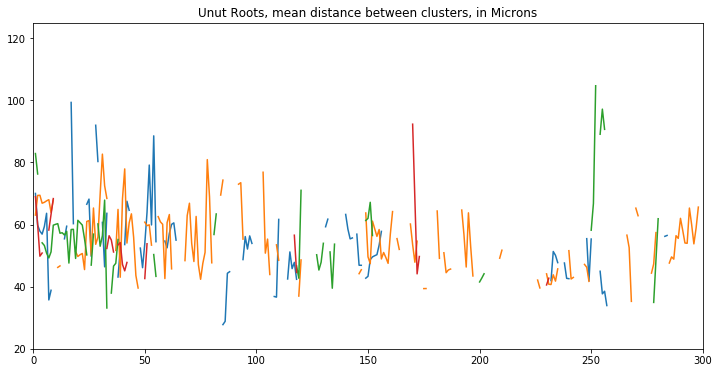

In [21]:
#plt.plot(uncut_PairWise['TimePoint'], uncut_PairWise['Means'])
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(uncut_PairWise['TimePoint'], uncut_PairWise['Means'])

plt.xlim([0,300])
plt.ylim([20,125])
plt.title('Unut Roots, mean distance between clusters, in Microns')

Text(0.5, 1.0, 'Cut Roots, mean distance between clusters, in Microns')

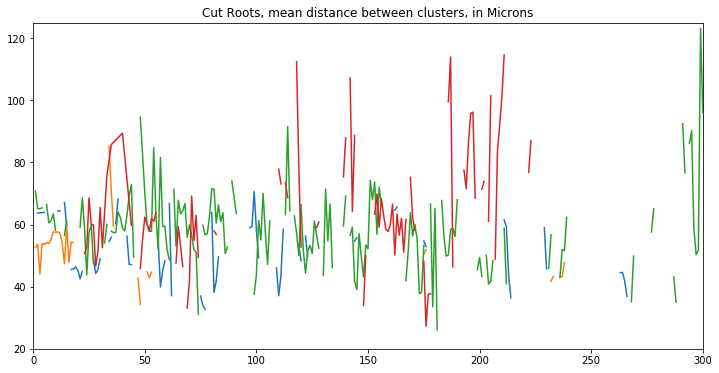

In [22]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(cut_PairWise['TimePoint'], cut_PairWise['Means'])

plt.xlim([0,300])
plt.ylim([20,125])
plt.title('Cut Roots, mean distance between clusters, in Microns')

Text(0.5, 1.0, 'Uncut Roots, mean distance between clusters, in Microns')

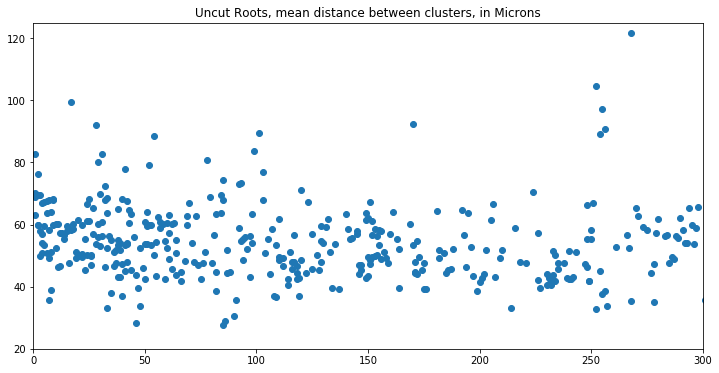

In [23]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(uncut_PairWise['TimePoint'], uncut_PairWise['Means'])

plt.xlim([0,300])
plt.ylim([20,125])
plt.title('Uncut Roots, mean distance between clusters, in Microns')

Text(0.5, 1.0, 'Cut Roots, mean distance between clusters, in Microns')

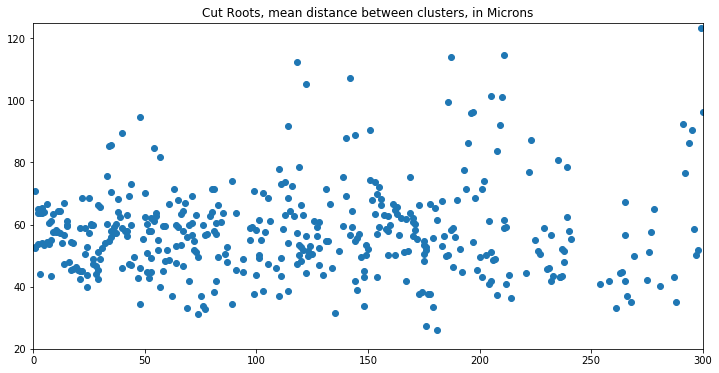

In [24]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(cut_PairWise['TimePoint'], cut_PairWise['Means'])

plt.xlim([0,300])
plt.ylim([20,125])
plt.title('Cut Roots, mean distance between clusters, in Microns')

## Uncut means and standard deviations

In [25]:
np.mean(uncut_PairWise['Means'])

Means    51.260553
Means    53.320130
Means    55.805681
Means    53.194740
dtype: float64

In [26]:
stds_uncut = np.std(uncut_PairWise['Means'])
stds_uncut

Means    11.377355
Means    14.247563
Means    15.032429
Means    10.252556
dtype: float64

In [27]:
mean_uncut = np.mean(np.mean(uncut_PairWise['Means']))
mean_uncut

53.39527620878769

## Cut means and standard deviations

In [28]:
np.mean(cut_PairWise['Means'])

Means    71.650579
Means    54.344392
Means    60.063777
Means    64.866498
dtype: float64

In [29]:
stds_cut = np.std(cut_PairWise['Means'])
stds_cut

Means    51.440766
Means    16.861374
Means    15.315829
Means    18.582843
dtype: float64

In [30]:
mean_std_cut = np.mean(stds_cut)
mean_std_uncut = np.mean(stds_uncut)

In [31]:
mean_cut = np.mean(np.mean(cut_PairWise['Means']))
mean_cut

62.731311516918744

### Can use the tall version of the dataset to get the means and standard deviations

In [32]:
## Uncut PairWise Distances
uncut_PairWise_tall = pd.concat([PD_142,PD_147,
                          PD_218,PD_219],axis=0)

## Uncut PairWise Distances
cut_PairWise_tall = pd.concat([PD_182,PD_192,
                          PD_200,PD_208],axis=0)

In [33]:
mean_uncut = np.mean(uncut_PairWise_tall['Means'])
mean_uncut

53.1873153231457

In [34]:
mean_cut = np.mean(cut_PairWise_tall['Means'])
mean_cut

63.447098146914556

In [35]:
std_uncut = np.std(uncut_PairWise_tall['Means'])
std_uncut

13.596491536774685

In [36]:
std_cut = np.std(cut_PairWise_tall['Means'])
std_cut

29.390380350786014

## May 10 todo
1.) put in line with mean, and shaded area with standard deviation  --Gunnar

2.) The interrupted lines are very confusing. Can you please render it with simple (big) dots at each value, without joining the dots with lines? You can keep the color code to distinguish roots.

3.) Organize the X-axis in three bins: [0,24], [24,72], [72,110] hours

4.) For each bin make a boxplot summarizing all the data-points (i.e. the distances between clusters) for all the cut roots in that time window, and another boxplot for all the data-points of the uncut roots.

### 1 put in line with mean, and shaded area with standard deviation

Keeping in mind, the standard deviation plotted here is in fact the average of the standard devaitions of the four roots in each class, that might not be the best way to go around it.



In [37]:
len(uncut_PairWise['TimePoint'])

671

Text(0.5, 1.0, 'Uncut Roots, mean distance between clusters, in Microns')

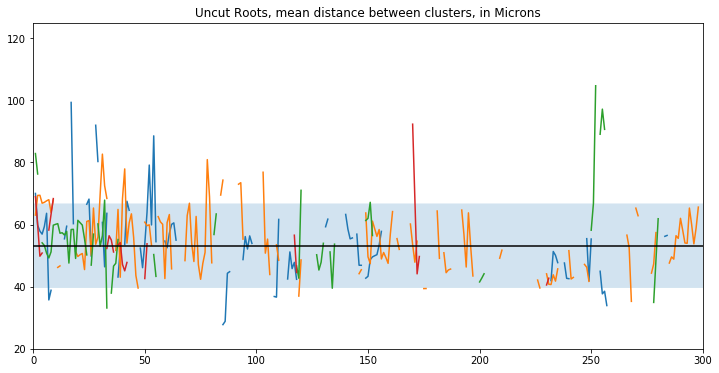

In [38]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(uncut_PairWise['TimePoint'], uncut_PairWise['Means'])
plt.axhline(y=mean_uncut, color='k', linestyle='-')
plt.fill_between(np.arange(0,len(uncut_PairWise['TimePoint']),1),mean_uncut-std_uncut, mean_uncut+std_uncut,
    alpha=0.2,
    linewidth=4, linestyle='dashdot', antialiased=True)
plt.xlim([0,300])
plt.ylim([20,125])
plt.title('Uncut Roots, mean distance between clusters, in Microns')

Text(0.5, 1.0, 'Cut Roots, mean distance between clusters, in Microns')

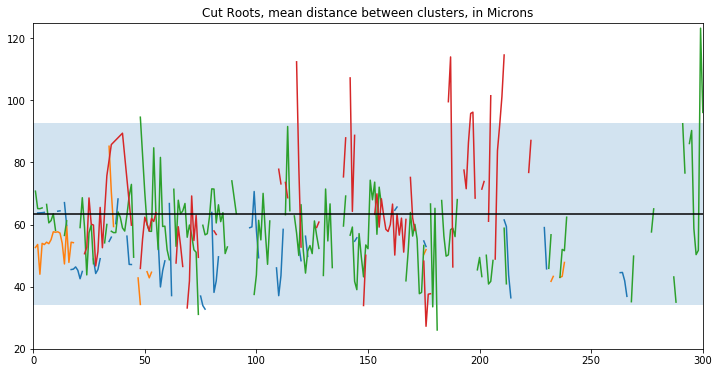

In [39]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(cut_PairWise['TimePoint'], cut_PairWise['Means'])
plt.axhline(y=mean_cut, color='k', linestyle='-')
plt.fill_between(np.arange(0,len(cut_PairWise['TimePoint']),1),mean_cut-std_cut, mean_cut+std_cut,
    alpha=0.2,
    linewidth=4, linestyle='dashdot', antialiased=True)

plt.xlim([0,300])
plt.ylim([20,125])
plt.title('Cut Roots, mean distance between clusters, in Microns')

## The interrupted lines are very confusing. Can you please render it with simple (big) dots at each value, without joining the dots with lines? You can keep the color code to distinguish roots.


Text(0.5, 1.0, 'Uncut Roots, mean distance between clusters, in Microns')

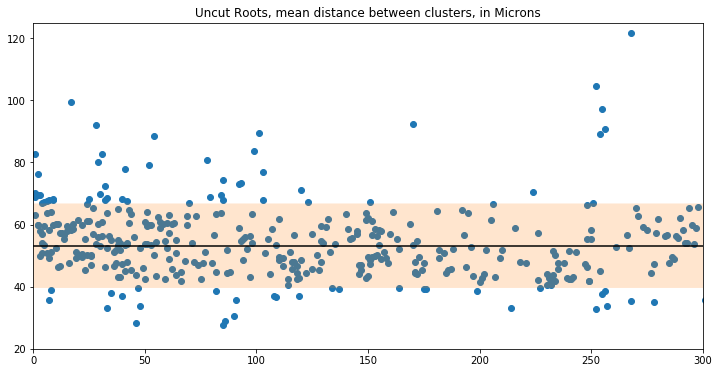

In [40]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(uncut_PairWise['TimePoint'], uncut_PairWise['Means'])

plt.axhline(y=mean_uncut, color='k', linestyle='-')
plt.fill_between(np.arange(0,len(uncut_PairWise['TimePoint']),1),mean_uncut-std_uncut, mean_uncut+std_uncut,
    alpha=0.2,
    linewidth=4, linestyle='dashdot', antialiased=True)

plt.xlim([0,300])
plt.ylim([20,125])
plt.title('Uncut Roots, mean distance between clusters, in Microns')

Text(0.5, 1.0, 'Cut Roots, mean distance between clusters, in Microns')

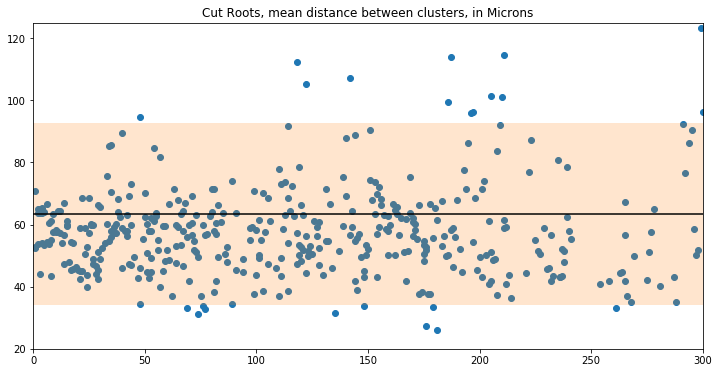

In [41]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(cut_PairWise['TimePoint'], cut_PairWise['Means'])

plt.axhline(y=mean_cut, color='k', linestyle='-')
plt.fill_between(np.arange(0,len(cut_PairWise['TimePoint']),1),mean_cut-std_cut, mean_cut+std_cut,
    alpha=0.2,
    linewidth=4, linestyle='dashdot', antialiased=True)

plt.xlim([0,300])
plt.ylim([20,125])
plt.title('Cut Roots, mean distance between clusters, in Microns')

### 3.) Organize the X-axis in three bins: [0,24], [24,72], [72,110] hours

Text(0.5, 1.0, 'Cut Roots, mean distance between clusters, in Microns')

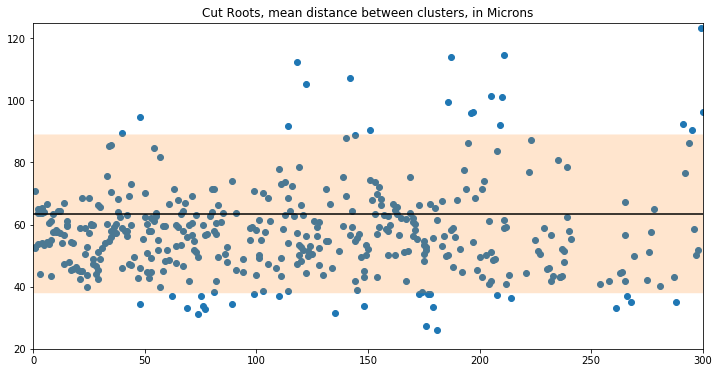

In [42]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(cut_PairWise_tall['TimePoint'], cut_PairWise_tall['Means'])

plt.axhline(y=mean_cut, color='k', linestyle='-')
plt.fill_between(np.arange(0,len(cut_PairWise_tall['TimePoint']),1),mean_cut-mean_std_cut, mean_cut+mean_std_cut,
    alpha=0.2,
    linewidth=4, linestyle='dashdot', antialiased=True)

plt.xlim([0,300])
plt.ylim([20,125])
plt.title('Cut Roots, mean distance between clusters, in Microns')

In [43]:
len(cut_PairWise)

423

In [44]:
cut_PairWise['TimeIndex'] = cut_PairWise.iloc[:,0]

In [45]:
cut_PairWise

,TimePoint,PairWise_Distances,Means,Medians,TimePoint,PairWise_Distances,Means,Medians,TimePoint,PairWise_Distances,Means,Medians,TimePoint,PairWise_Distances,Means,Medians,TimeIndex
0,1,NaN,NaN,NaN,1.0,"[47.38563787792146, 36.07079869322758, 74.3402...",52.598895,47.385638,1.0,[70.74136742387724],70.741367,70.741367,1.0,[52.76685275814732],52.766853,52.766853,1
1,2,[63.72171128430246],63.721711,63.721711,2.0,"[50.38507892864546, 36.32830604793595, 74.0545...",53.589297,50.385079,2.0,[65.13304935860135],65.133049,65.133049,2.0,NaN,NaN,NaN,2
2,3,[63.76755129374185],63.767551,63.767551,3.0,[44.00707034615446],44.007070,44.007070,3.0,[65.10790639392424],65.107906,65.107906,3.0,NaN,NaN,NaN,3
3,4,[63.81819490552831],63.818195,63.818195,4.0,"[54.72064373651662, 55.17551688930761, 51.9399...",53.945375,54.720644,4.0,[65.35934310601658],65.359343,65.359343,4.0,NaN,NaN,NaN,4
4,5,[63.918894671294154],63.918895,63.918895,5.0,"[44.53805863154193, 54.45112541562182, 34.0932...",53.560164,53.419066,5.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,5
5,6,NaN,NaN,NaN,6.0,"[44.97961390081807, 54.76376361276426, 35.0557...",54.325599,53.993758,6.0,[66.48050250846319],66.480503,66.480503,6.0,NaN,NaN,NaN,6
6,7,NaN,NaN,NaN,7.0,"[41.57110635204859, 52.2667177800558, 37.11008...",53.840124,53.025826,7.0,[60.546235065076964],60.546235,60.546235,7.0,NaN,NaN,NaN,7
7,8,NaN,NaN,NaN,8.0,"[46.060931263804115, 55.03905145187573, 35.481...",55.128506,54.730071,8.0,[61.273190553092256],61.273191,61.273191,8.0,[43.2893462759603],43.289346,43.289346,8
8,9,NaN,NaN,NaN,9.0,"[46.333494004517554, 60.32697075106623, 36.449...",57.662713,61.019313,9.0,"[54.532638901446504, 57.73068166543295, 78.096...",63.453352,57.730682,9.0,NaN,NaN,NaN,9
9,10,NaN,NaN,NaN,10.0,"[46.63873652281377, 43.14936677346945, 55.7564...",57.527422,54.838234,10.0,[58.153858427450885],58.153858,58.153858,10.0,NaN,NaN,NaN,10


 Using same as in figure 2:
 
 
#declare how many hours are beginning, middle, late

events_cut_day_1 = events_cut[events_cut['Time']<=24]

events_cut_middle = events_cut[(events_cut['Time']>24) & (events_cut['Time'] <= 72)]

events_cut_late = events_cut[events_cut['Time']>72]


events_uncut_day_1 = events_uncut[events_uncut['Time']<=24]

events_uncut_middle = events_uncut[(events_uncut['Time']>24) & (events_uncut['Time'] <= 72)]

events_uncut_late = events_uncut[events_uncut['Time']>72]


In [46]:
uncut_PairWise_day_1 = uncut_PairWise_tall[uncut_PairWise_tall['TimePoint']<=24*4]
uncut_PairWise_middle = uncut_PairWise_tall[(uncut_PairWise_tall['TimePoint']>24*4) &(uncut_PairWise_tall['TimePoint']<=72*4)]
uncut_PairWise_late = uncut_PairWise_tall[uncut_PairWise_tall['TimePoint']>72*4]

In [47]:
cut_PairWise_day_1 = cut_PairWise_tall[cut_PairWise_tall['TimePoint']<=24*4]
cut_PairWise_middle = cut_PairWise_tall[(cut_PairWise_tall['TimePoint']>24*4) &(cut_PairWise_tall['TimePoint']<=72*4)]
cut_PairWise_late = cut_PairWise_tall[cut_PairWise_tall['TimePoint']>72*4]

In [48]:
def plot_COMs_grouped(df):
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.scatter(df['TimePoint'], df['Means'])
    
    mean_df = np.mean(df['Means'])
    std_df = np.std(df['Means'])

    plt.axhline(y=mean_df, color='k', linestyle='-')
    plt.fill_between(np.arange(0,max(df['TimePoint'])+1,1),mean_df+std_df, mean_df-std_df,
    alpha=0.2,
    linewidth=4, linestyle='dashdot', antialiased=True)
    
    x_min = min(df['TimePoint'])
    x_max = max(df['TimePoint'])
    
    plt.xlim([x_min,x_max])
    plt.ylim([20,125])
    
    print('Mean is: ', mean_df)
    print('Standard Deviation is: ', std_df)
    return mean_df, std_df
    
    

Mean is:  56.24252517310317
Standard Deviation is:  11.491898632732292


Text(0.5, 1.0, 'Uncut Roots, mean distance between clusters, 0-24 hours, in Microns')

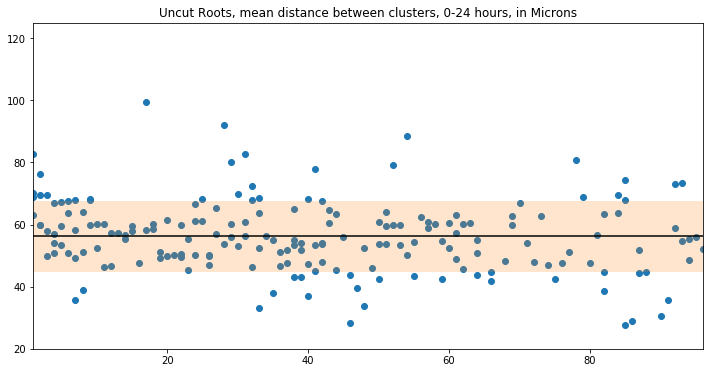

In [49]:
mean_uncut_day1, std_uncut_day1 = plot_COMs_grouped(uncut_PairWise_day_1)
plt.title('Uncut Roots, mean distance between clusters, 0-24 hours, in Microns')

Mean is:  56.3787248371422
Standard Deviation is:  10.7204044681902


Text(0.5, 1.0, 'Cut Roots, mean distance between clusters, 0-24 hours, in Microns')

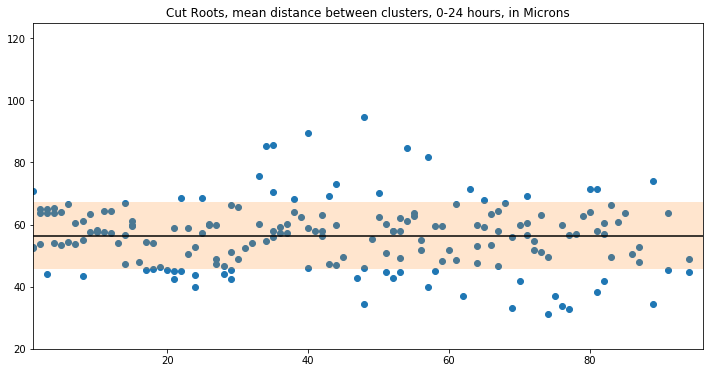

In [50]:
mean_cut_day1, std_cut_day1 = plot_COMs_grouped(cut_PairWise_day_1)
plt.title('Cut Roots, mean distance between clusters, 0-24 hours, in Microns')

Mean is:  52.89014442987967
Standard Deviation is:  13.923695353787862


Text(0.5, 1.0, 'Uncut Roots, mean distance between clusters, 24-72 hours, in Microns')

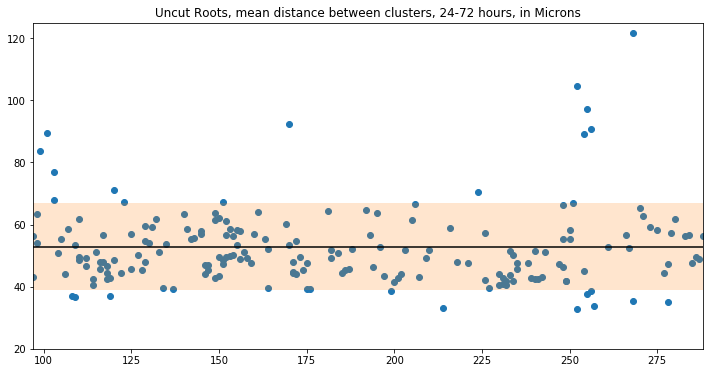

In [51]:
mean_uncut_middle, std_uncut_middle = plot_COMs_grouped(uncut_PairWise_middle)
plt.title('Uncut Roots, mean distance between clusters, 24-72 hours, in Microns')

Mean is:  58.281017079813836
Standard Deviation is:  17.033882175808273


Text(0.5, 1.0, 'Cut Roots, mean distance between clusters, 24-72 hours, in Microns')

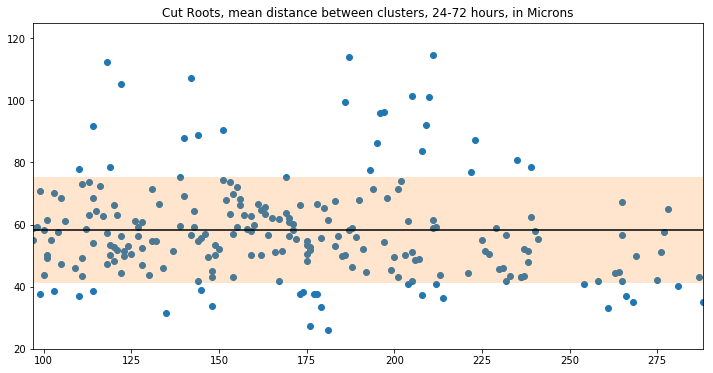

In [52]:
mean_cut_middle, std_cut_middle = plot_COMs_grouped(cut_PairWise_middle)
plt.title('Cut Roots, mean distance between clusters, 24-72 hours, in Microns')

Mean is:  50.50342346217568
Standard Deviation is:  14.527737903936039


Text(0.5, 1.0, 'Uncut Roots, mean distance between clusters, >72 hours, in Microns')

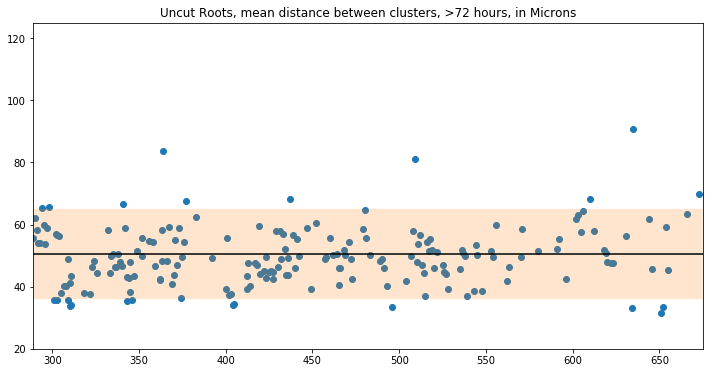

In [53]:
mean_uncut_late, std_uncut_late = plot_COMs_grouped(uncut_PairWise_late)
plt.title('Uncut Roots, mean distance between clusters, >72 hours, in Microns')

Mean is:  108.50977400686102
Standard Deviation is:  58.640214056694624


(20, 325)

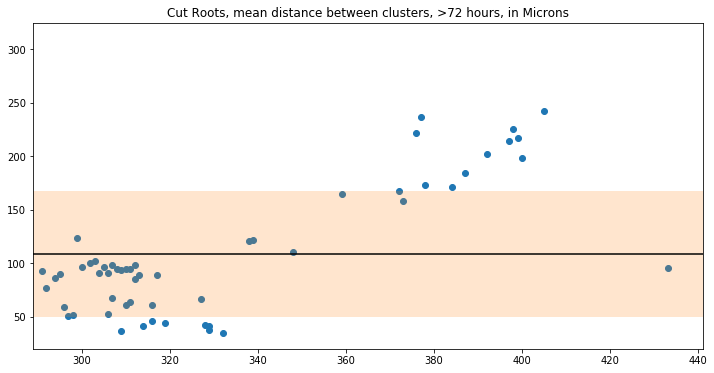

In [54]:
mean_cut_late, std_cut_late = plot_COMs_grouped(cut_PairWise_late)
plt.title('Cut Roots, mean distance between clusters, >72 hours, in Microns')
plt.ylim([20,325])

In [55]:
uncut_PairWise_day_1.head()

,TimePoint,PairWise_Distances,Means,Medians
0,1,"[65.20946796669944, 64.94397681848564, 79.8899...",70.014460,65.209468
1,2,[59.78957681547212],59.789577,59.789577
2,3,[57.87890120856733],57.878901,57.878901
3,4,"[64.06744193252746, 45.02897900241575, 61.6494...",56.915288,61.649444
4,5,[59.372619991773135],59.372620,59.372620


## 4.) For each bin make a boxplot summarizing all the data-points (i.e. the distances between clusters) for all the cut roots in that time window, and another boxplot for all the data-points of the uncut roots.

In [56]:
uncut_PairWise.head()

,TimePoint,PairWise_Distances,Means,Medians,TimePoint,PairWise_Distances,Means,Medians,TimePoint,PairWise_Distances,Means,Medians,TimePoint,PairWise_Distances,Means,Medians
0,1.0,"[65.20946796669944, 64.94397681848564, 79.8899...",70.014460,65.209468,1,"[57.944510956604, 73.62748913449379, 57.555183...",63.042394,57.944511,1.0,[82.85819647395583],82.858196,82.858196,1.0,[68.98015072790467],68.980151,68.980151
1,2.0,[59.78957681547212],59.789577,59.789577,2,"[69.8247740888755, 63.24777378740298, 72.59195...",69.383580,66.536274,2.0,[76.28078464626591],76.280785,76.280785,2.0,[59.87207850910137],59.872079,59.872079
2,3.0,[57.87890120856733],57.878901,57.878901,3,"[69.76128610527833, 63.50148523115423, 72.1148...",69.428569,66.631386,3.0,NaN,NaN,NaN,3.0,[49.8126850689438],49.812685,49.812685
3,4.0,"[64.06744193252746, 45.02897900241575, 61.6494...",56.915288,61.649444,4,"[69.70384863163942, 72.03414989824272, 58.8630...",66.867026,69.703849,4.0,"[61.84369500603922, 53.75678615765642, 46.7444...",54.114991,53.756786,4.0,[50.83077322105185],50.830773,50.830773
4,5.0,[59.372619991773135],59.372620,59.372620,5,"[70.31128345614238, 72.1596109329866, 59.00007...",67.156991,70.311283,5.0,"[71.60687258217607, 61.688350444436054, 46.057...",53.259228,53.872942,5.0,NaN,NaN,NaN


In [57]:
PD_142.head()

,TimePoint,PairWise_Distances,Means,Medians
0,1,"[65.20946796669944, 64.94397681848564, 79.8899...",70.014460,65.209468
1,2,[59.78957681547212],59.789577,59.789577
2,3,[57.87890120856733],57.878901,57.878901
3,4,"[64.06744193252746, 45.02897900241575, 61.6494...",56.915288,61.649444
4,5,[59.372619991773135],59.372620,59.372620


In [58]:
### What we need to do for Giovanni's plots is to make a column that has the root number along each row
PD_142['Root']='Root_142'
PD_147['Root']='Root_147'
PD_218['Root']='Root_218'
PD_219['Root']='Root_219'

PD_182['Root']='Root_182'
PD_192['Root']='Root_192'
PD_200['Root']='Root_200'
PD_208['Root']='Root_208'

In [59]:
### Write out to csv for Giovanni

outpath= 'C:\\Users\\fallest\\Google Drive\\Imperial Paper\\dbscan\\data_out\\'

PD_142.to_csv(outpath+'PD_142_Sena.csv')
PD_147.to_csv(outpath+'PD_147_Sena.csv')
PD_218.to_csv(outpath+'PD_218_Sena.csv')
PD_219.to_csv(outpath+'PD_219_Sena.csv')

PD_182.to_csv(outpath+'PD_182_Sena.csv')
PD_192.to_csv(outpath+'PD_192_Sena.csv')
PD_200.to_csv(outpath+'PD_200_Sena.csv')
PD_208.to_csv(outpath+'PD_208_Sena.csv')

cut_PairWise_tall.to_csv(outpath+'PD_cut_Pairwise_Sena.csv')
uncut_PairWise_tall.to_csv(outpath+'PD_uncut_Pairwise_Sena.csv')

In [60]:
##Early
uncut_PairWise_day_1 = pd.concat([PD_142[PD_142['TimePoint']<=24*4],
                                PD_147[PD_147['TimePoint']<=24*4],
                                PD_218[PD_218['TimePoint']<=24*4],
                                PD_219[PD_219['TimePoint']<=24*4]],axis=0)



cut_PairWise_day_1 = pd.concat([PD_182[PD_182['TimePoint']<=24*4],
                                PD_192[PD_192['TimePoint']<=24*4],
                                PD_200[PD_200['TimePoint']<=24*4],
                                PD_208[PD_208['TimePoint']<=24*4]],axis=0)

##Middle
#uncut_PairWise_middle = PD_142[(PD_142['TimePoint']>24*4) &(PD_142['TimePoint']<=72*4)]

uncut_PairWise_middle = pd.concat([PD_142[(PD_142['TimePoint']>24*4) &(PD_142['TimePoint']<=72*4)],
                                PD_147[(PD_147['TimePoint']>24*4) &(PD_147['TimePoint']<=72*4)],
                                PD_218[(PD_218['TimePoint']>24*4) &(PD_218['TimePoint']<=72*4)],
                                PD_219[(PD_219['TimePoint']>24*4) &(PD_219['TimePoint']<=72*4)]],axis=0)


cut_PairWise_middle = pd.concat([PD_182[(PD_182['TimePoint']>24*4) &(PD_182['TimePoint']<=72*4)],
                                PD_192[(PD_192['TimePoint']>24*4) &(PD_192['TimePoint']<=72*4)],
                                PD_200[(PD_200['TimePoint']>24*4) &(PD_200['TimePoint']<=72*4)],
                                PD_208[(PD_208['TimePoint']>24*4) &(PD_208['TimePoint']<=72*4)]],axis=0)


#Late

uncut_PairWise_late = pd.concat([PD_142[PD_142['TimePoint']>72*4],
                                PD_147[PD_147['TimePoint']>72*4],
                                PD_218[PD_218['TimePoint']>72*4],
                                PD_219[PD_219['TimePoint']>72*4]],axis=0)


cut_PairWise_late = pd.concat([PD_182[PD_182['TimePoint']>72*4],
                                PD_192[PD_192['TimePoint']>72*4],
                                PD_200[PD_200['TimePoint']>72*4],
                                PD_208[PD_208['TimePoint']>72*4]],axis=0)








In [61]:
uncut_PairWise_day_1.head()

,TimePoint,PairWise_Distances,Means,Medians,Root
0,1,"[65.20946796669944, 64.94397681848564, 79.8899...",70.014460,65.209468,Root_142
1,2,[59.78957681547212],59.789577,59.789577,Root_142
2,3,[57.87890120856733],57.878901,57.878901,Root_142
3,4,"[64.06744193252746, 45.02897900241575, 61.6494...",56.915288,61.649444,Root_142
4,5,[59.372619991773135],59.372620,59.372620,Root_142


Text(0.5, 1.0, 'Uncut Roots, mean distance between clusters, 0-24 hours, in Microns')

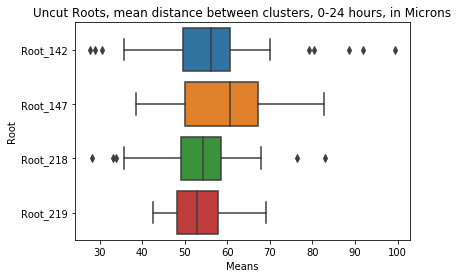

In [62]:
sns.boxplot(x='Means', y='Root', data=uncut_PairWise_day_1)
plt.title('Uncut Roots, mean distance between clusters, 0-24 hours, in Microns')

Text(0.5, 1.0, 'Cut Roots, mean distance between clusters, 0-24 hours, in Microns')

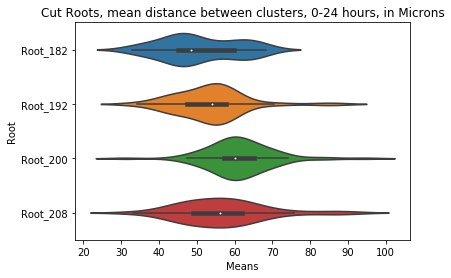

In [63]:
sns.violinplot(x='Means', y='Root', data=cut_PairWise_day_1)
plt.title('Cut Roots, mean distance between clusters, 0-24 hours, in Microns')

Text(0.5, 1.0, 'Cut Roots, mean distance between clusters, 0-24 hours, in Microns')

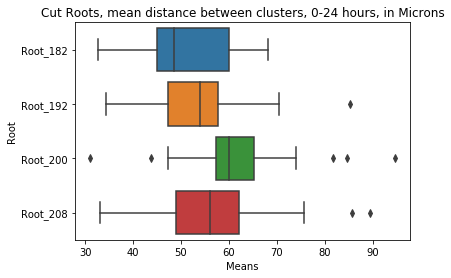

In [64]:
sns.boxplot(x='Means', y='Root', data=cut_PairWise_day_1)
plt.title('Cut Roots, mean distance between clusters, 0-24 hours, in Microns')

Text(0.5, 1.0, 'Uncut Roots, mean distance between clusters, 24-72 hours, in Microns')

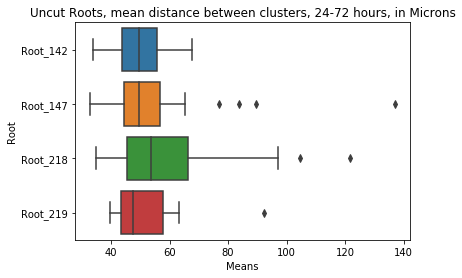

In [65]:
sns.boxplot(x='Means', y='Root', data=uncut_PairWise_middle)
plt.title('Uncut Roots, mean distance between clusters, 24-72 hours, in Microns')

Text(0.5, 1.0, 'Cut Roots, mean distance between clusters, 24-72 hours, in Microns')

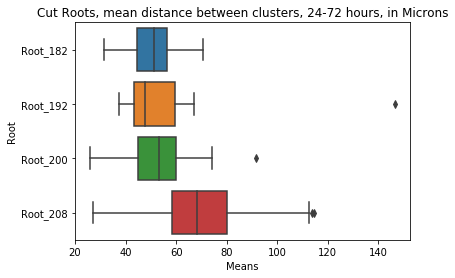

In [66]:
sns.boxplot(x='Means', y='Root', data=cut_PairWise_middle)
plt.title('Cut Roots, mean distance between clusters, 24-72 hours, in Microns')

Text(0.5, 1.0, 'Uncut Roots, mean distance between clusters, >72 hours, in Microns')

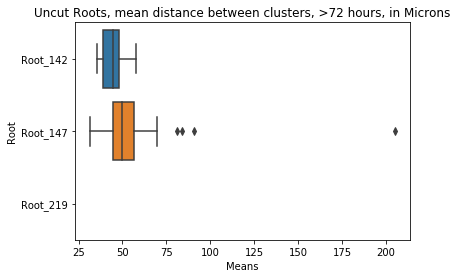

In [67]:
sns.boxplot(x='Means', y='Root', data=uncut_PairWise_late)
plt.title('Uncut Roots, mean distance between clusters, >72 hours, in Microns')

Text(0.5, 1.0, 'Cut Roots, mean distance between clusters, >72 hours, in Microns')

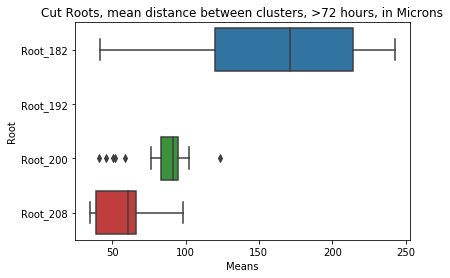

In [68]:
sns.boxplot(x='Means', y='Root', data=cut_PairWise_late)
plt.title('Cut Roots, mean distance between clusters, >72 hours, in Microns')

### Let's do this for each day individually

In [69]:
##Early
uncut_PairWise_day_1 = pd.concat([PD_142[PD_142['TimePoint']<=24*4],
                                PD_147[PD_147['TimePoint']<=24*4],
                                PD_218[PD_218['TimePoint']<=24*4],
                                PD_219[PD_219['TimePoint']<=24*4]],axis=0)



cut_PairWise_day_1 = pd.concat([PD_182[PD_182['TimePoint']<=24*4],
                                PD_192[PD_192['TimePoint']<=24*4],
                                PD_200[PD_200['TimePoint']<=24*4],
                                PD_208[PD_208['TimePoint']<=24*4]],axis=0)

##Day 2
#uncut_PairWise_middle = PD_142[(PD_142['TimePoint']>24*4) &(PD_142['TimePoint']<=72*4)]

uncut_PairWise_day_2 = pd.concat([PD_142[(PD_142['TimePoint']>24*4) &(PD_142['TimePoint']<=48*4)],
                                PD_147[(PD_147['TimePoint']>24*4) &(PD_147['TimePoint']<=48*4)],
                                PD_218[(PD_218['TimePoint']>24*4) &(PD_218['TimePoint']<=48*4)],
                                PD_219[(PD_219['TimePoint']>24*4) &(PD_219['TimePoint']<=48*4)]],axis=0)


cut_PairWise_day_2 = pd.concat([PD_182[(PD_182['TimePoint']>24*4) &(PD_182['TimePoint']<=48*4)],
                                PD_192[(PD_192['TimePoint']>24*4) &(PD_192['TimePoint']<=48*4)],
                                PD_200[(PD_200['TimePoint']>24*4) &(PD_200['TimePoint']<=48*4)],
                                PD_208[(PD_208['TimePoint']>24*4) &(PD_208['TimePoint']<=48*4)]],axis=0)


#Day 3
uncut_PairWise_day_3 = pd.concat([PD_142[(PD_142['TimePoint']>48*4) &(PD_142['TimePoint']<=72*4)],
                                PD_147[(PD_147['TimePoint']>48*4) &(PD_147['TimePoint']<=72*4)],
                                PD_218[(PD_218['TimePoint']>48*4) &(PD_218['TimePoint']<=72*4)],
                                PD_219[(PD_219['TimePoint']>48*4) &(PD_219['TimePoint']<=72*4)]],axis=0)


cut_PairWise_day_3 = pd.concat([PD_182[(PD_182['TimePoint']>48*4) &(PD_182['TimePoint']<=72*4)],
                                PD_192[(PD_192['TimePoint']>48*4) &(PD_192['TimePoint']<=72*4)],
                                PD_200[(PD_200['TimePoint']>48*4) &(PD_200['TimePoint']<=72*4)],
                                PD_208[(PD_208['TimePoint']>48*4) &(PD_208['TimePoint']<=72*4)]],axis=0)



#Day 4+

uncut_PairWise_day_4 = pd.concat([PD_142[PD_142['TimePoint']>72*4],
                                PD_147[PD_147['TimePoint']>72*4],
                                PD_218[PD_218['TimePoint']>72*4],
                                PD_219[PD_219['TimePoint']>72*4]],axis=0)


cut_PairWise_day_4 = pd.concat([PD_182[PD_182['TimePoint']>72*4],
                                PD_192[PD_192['TimePoint']>72*4],
                                PD_200[PD_200['TimePoint']>72*4],
                                PD_208[PD_208['TimePoint']>72*4]],axis=0)


Text(0.5, 1.0, 'Uncut Roots, mean distance between clusters, 0-24 hours, in Microns')

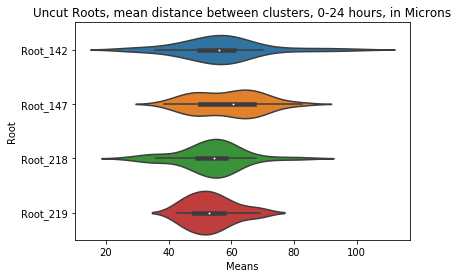

In [70]:
sns.violinplot(x='Means', y='Root', data=uncut_PairWise_day_1)
plt.title('Uncut Roots, mean distance between clusters, 0-24 hours, in Microns')

Text(0.5, 1.0, 'Cut Roots, mean distance between clusters, 0-24 hours, in Microns')

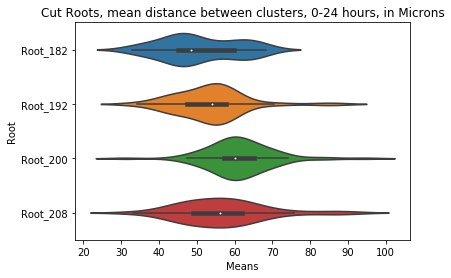

In [71]:
sns.violinplot(x='Means', y='Root', data=cut_PairWise_day_1)
plt.title('Cut Roots, mean distance between clusters, 0-24 hours, in Microns')

Text(0.5, 1.0, 'Uncut Roots, mean distance between clusters, 24-48 hours, in Microns')

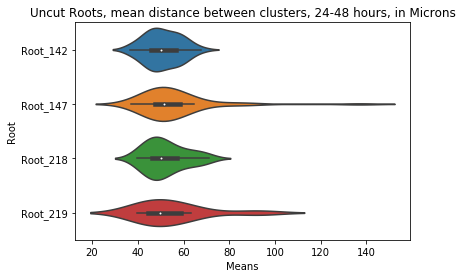

In [72]:
sns.violinplot(x='Means', y='Root', data=uncut_PairWise_day_2)
plt.title('Uncut Roots, mean distance between clusters, 24-48 hours, in Microns')

Text(0.5, 1.0, 'Cut Roots, mean distance between clusters, 24-48 hours, in Microns')

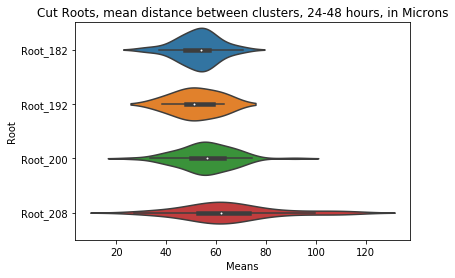

In [73]:
sns.violinplot(x='Means', y='Root', data=cut_PairWise_day_2)
plt.title('Cut Roots, mean distance between clusters, 24-48 hours, in Microns')

Text(0.5, 1.0, 'Uncut Roots, mean distance between clusters, 48-72 hours, in Microns')

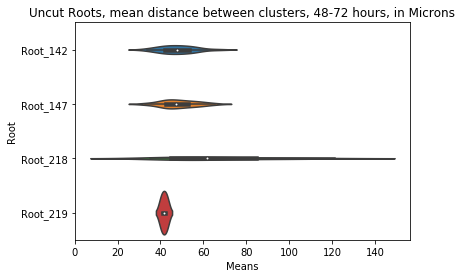

In [74]:
sns.violinplot(x='Means', y='Root', data=uncut_PairWise_day_3)
plt.title('Uncut Roots, mean distance between clusters, 48-72 hours, in Microns')

Text(0.5, 1.0, 'Cut Roots, mean distance between clusters, 48-72 hours, in Microns')

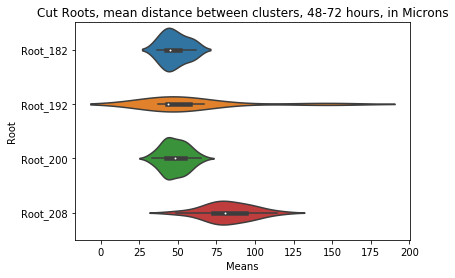

In [75]:
sns.violinplot(x='Means', y='Root', data=cut_PairWise_day_3)
plt.title('Cut Roots, mean distance between clusters, 48-72 hours, in Microns')

Text(0.5, 1.0, 'Uncut Roots, mean distance between clusters, 72+ hours, in Microns')

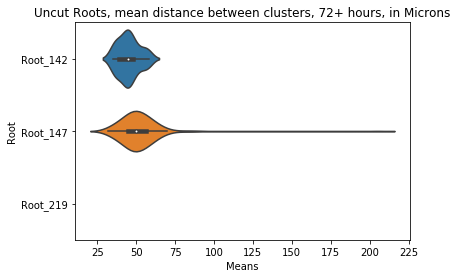

In [76]:
sns.violinplot(x='Means', y='Root', data=uncut_PairWise_day_4)
plt.title('Uncut Roots, mean distance between clusters, 72+ hours, in Microns')

Text(0.5, 1.0, 'Cut Roots, mean distance between clusters, 72+ hours, in Microns')

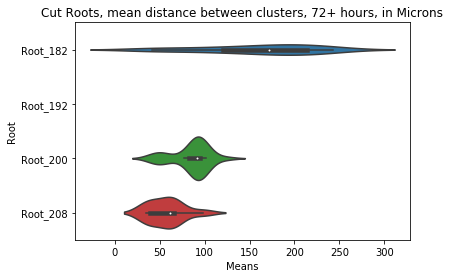

In [77]:
sns.violinplot(x='Means', y='Root', data=cut_PairWise_day_4)
plt.title('Cut Roots, mean distance between clusters, 72+ hours, in Microns')

Text(0.5, 0.98, 'Mean Distance Between Clusters, in Microns')

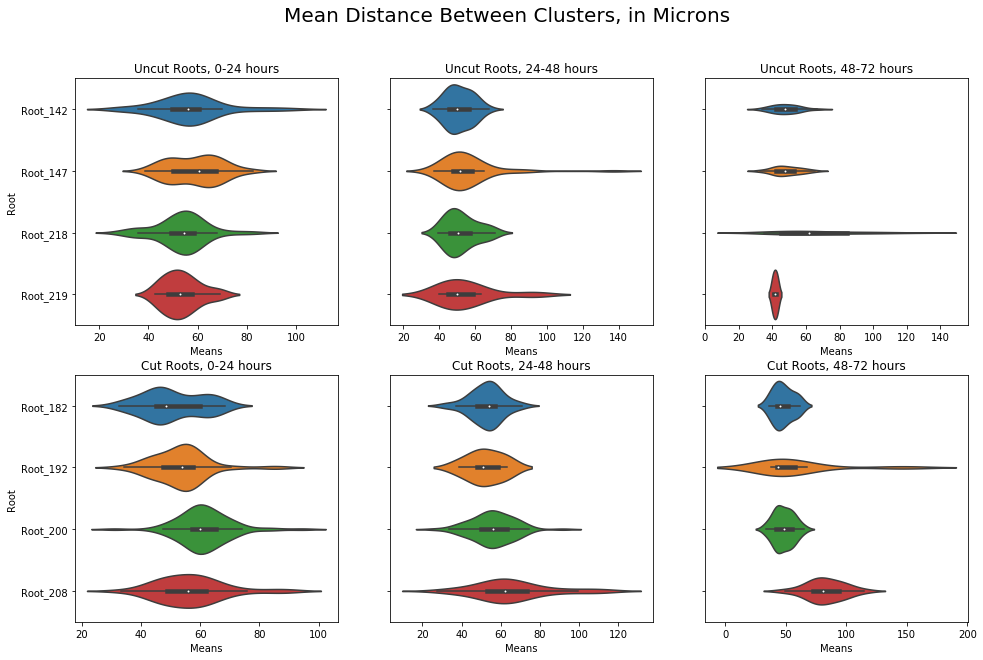

In [78]:
#https://towardsdatascience.com/subplots-in-matplotlib-a-guide-and-tool-for-planning-your-plots-7d63fa632857
fig = plt.figure(figsize=(16,10))

fig.add_subplot(2,3,1)
sns.violinplot(x='Means', y='Root', data=uncut_PairWise_day_1)
plt.title('Uncut Roots, 0-24 hours')

fig.add_subplot(2,3,4)
sns.violinplot(x='Means', y='Root', data=cut_PairWise_day_1)
plt.title('Cut Roots, 0-24 hours')

fig.add_subplot(2,3,2)
sns.violinplot(x='Means', y='Root', data=uncut_PairWise_day_2).set(yticklabels=[], ylabel='')
plt.title('Uncut Roots, 24-48 hours')

fig.add_subplot(2,3,5)
sns.violinplot(x='Means', y='Root', data=cut_PairWise_day_2).set(yticklabels=[], ylabel='')
plt.title('Cut Roots, 24-48 hours')

fig.add_subplot(2,3,3)
sns.violinplot(x='Means', y='Root', data=uncut_PairWise_day_3).set(yticklabels=[], ylabel='')
plt.title('Uncut Roots, 48-72 hours')

fig.add_subplot(2,3,6)
sns.violinplot(x='Means', y='Root', data=cut_PairWise_day_3).set(yticklabels=[], ylabel='')
plt.title('Cut Roots, 48-72 hours')


fig.suptitle('Mean Distance Between Clusters, in Microns', fontsize=20) 
#fig.savefig('ViolinPlots_COM.png')

Text(0.5, 0.98, 'Mean Distance Between Clusters, in Microns')

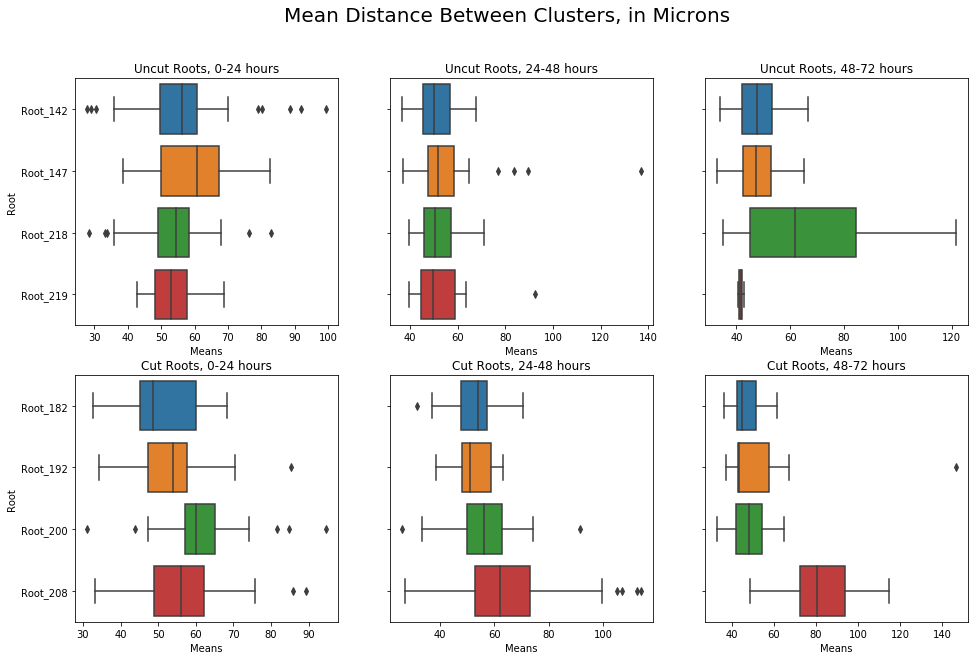

In [79]:
fig = plt.figure(figsize=(16,10))

fig.add_subplot(2,3,1)
sns.boxplot(x='Means', y='Root', data=uncut_PairWise_day_1)
plt.title('Uncut Roots, 0-24 hours')

fig.add_subplot(2,3,4)
sns.boxplot(x='Means', y='Root', data=cut_PairWise_day_1)
plt.title('Cut Roots, 0-24 hours')

fig.add_subplot(2,3,2)
sns.boxplot(x='Means', y='Root', data=uncut_PairWise_day_2).set(yticklabels=[], ylabel='')
plt.title('Uncut Roots, 24-48 hours')

fig.add_subplot(2,3,5)
sns.boxplot(x='Means', y='Root', data=cut_PairWise_day_2).set(yticklabels=[], ylabel='')
plt.title('Cut Roots, 24-48 hours')

fig.add_subplot(2,3,3)
sns.boxplot(x='Means', y='Root', data=uncut_PairWise_day_3).set(yticklabels=[], ylabel='')
plt.title('Uncut Roots, 48-72 hours')

fig.add_subplot(2,3,6)
sns.boxplot(x='Means', y='Root', data=cut_PairWise_day_3).set(yticklabels=[], ylabel='')
plt.title('Cut Roots, 48-72 hours')

#
fig.suptitle('Mean Distance Between Clusters, in Microns', fontsize=20) 
#fig.savefig('BoxPlots_COM.png')

Text(0.5, 0.98, 'Mean Distance Between Clustes, in Microns')

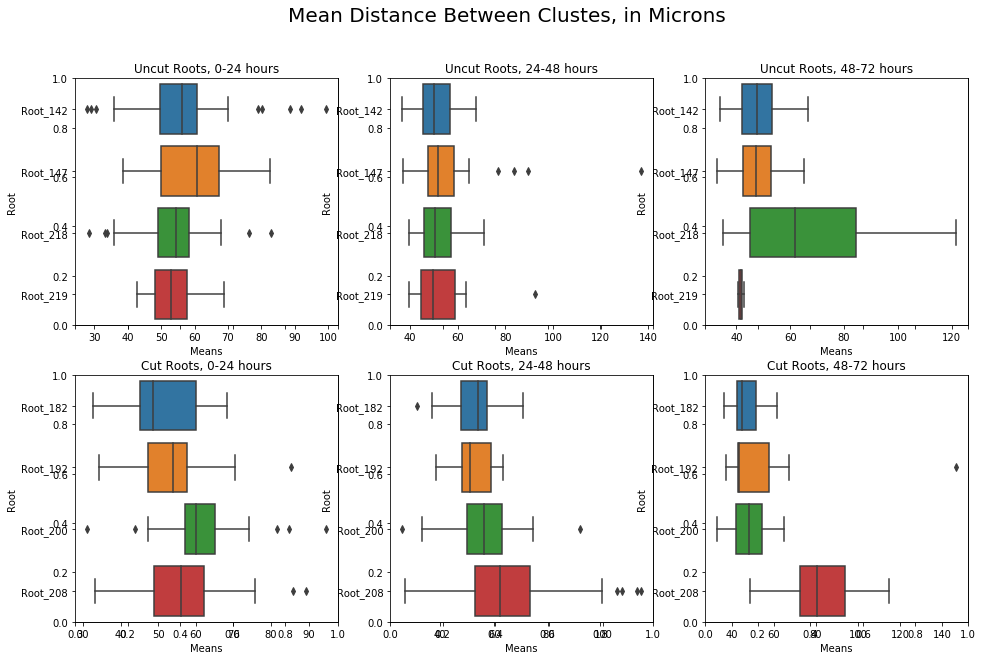

In [80]:
fig, ax = plt.subplots(nrows=2, ncols=3, sharex=True, figsize=(16, 10))


fig.add_subplot(2,3,1)
sns.boxplot(x='Means', y='Root', data=uncut_PairWise_day_1)
plt.title('Uncut Roots, 0-24 hours')

fig.add_subplot(2,3,4)
sns.boxplot(x='Means', y='Root', data=cut_PairWise_day_1)
plt.title('Cut Roots, 0-24 hours')

fig.add_subplot(2,3,2)
sns.boxplot(x='Means', y='Root', data=uncut_PairWise_day_2)
plt.title('Uncut Roots, 24-48 hours')

fig.add_subplot(2,3,5)
sns.boxplot(x='Means', y='Root', data=cut_PairWise_day_2)
plt.title('Cut Roots, 24-48 hours')

fig.add_subplot(2,3,3)
sns.boxplot(x='Means', y='Root', data=uncut_PairWise_day_3)
plt.title('Uncut Roots, 48-72 hours')

fig.add_subplot(2,3,6)
sns.boxplot(x='Means', y='Root', data=cut_PairWise_day_3)
plt.title('Cut Roots, 48-72 hours')


fig.suptitle('Mean Distance Between Clustes, in Microns', fontsize=20) 


 ## For Sena, June 13
 ### Make just two box plots, cut and uncut, for 0-6 hours, 6-24 hours and 24+ hours
 

    ### Recalculate the data

In [81]:
##Early
uncut_PairWise_early = pd.concat([PD_142[PD_142['TimePoint']<=6*4],
                                PD_147[PD_147['TimePoint']<=6*4],
                                PD_218[PD_218['TimePoint']<=6*4],
                                PD_219[PD_219['TimePoint']<=6*4]],axis=0)



cut_PairWise_early = pd.concat([PD_182[PD_182['TimePoint']<=6*4],
                                PD_192[PD_192['TimePoint']<=6*4],
                                PD_200[PD_200['TimePoint']<=6*4],
                                PD_208[PD_208['TimePoint']<=6*4]],axis=0)

##Day 2
#uncut_PairWise_middle = PD_142[(PD_142['TimePoint']>24*4) &(PD_142['TimePoint']<=72*4)]

uncut_PairWise_middle = pd.concat([PD_142[(PD_142['TimePoint']>6*4) &(PD_142['TimePoint']<=24*4)],
                                PD_147[(PD_147['TimePoint']>6*4) &(PD_147['TimePoint']<=24*4)],
                                PD_218[(PD_218['TimePoint']>6*4) &(PD_218['TimePoint']<=24*4)],
                                PD_219[(PD_219['TimePoint']>6*4) &(PD_219['TimePoint']<=24*4)]],axis=0)


cut_PairWise_middle = pd.concat([PD_182[(PD_182['TimePoint']>6*4) &(PD_182['TimePoint']<=24*4)],
                                PD_192[(PD_192['TimePoint']>6*4) &(PD_192['TimePoint']<=24*4)],
                                PD_200[(PD_200['TimePoint']>6*4) &(PD_200['TimePoint']<=24*4)],
                                PD_208[(PD_208['TimePoint']>6*4) &(PD_208['TimePoint']<=24*4)]],axis=0)


#Day 3
#uncut_PairWise_late = pd.concat([PD_142[(PD_142['TimePoint']>48*4) &(PD_142['TimePoint']<=72*4)],
 ##                               PD_147[(PD_147['TimePoint']>48*4) &(PD_147['TimePoint']<=72*4)],
   #                             PD_218[(PD_218['TimePoint']>48*4) &(PD_218['TimePoint']<=72*4)],
    #                            PD_219[(PD_219['TimePoint']>48*4) &(PD_219['TimePoint']<=72*4)]],axis=0)
#

#cut_PairWise_late = pd.concat([PD_182[(PD_182['TimePoint']>48*4) &(PD_182['TimePoint']<=72*4)],
 #                               PD_192[(PD_192['TimePoint']>48*4) &(PD_192['TimePoint']<=72*4)],
  #                              PD_200[(PD_200['TimePoint']>48*4) &(PD_200['TimePoint']<=72*4)],
   #                             PD_208[(PD_208['TimePoint']>48*4) &(PD_208['TimePoint']<=72*4)]],axis=0)



#Day 4+

uncut_PairWise_late = pd.concat([PD_142[PD_142['TimePoint']>24*4],
                                PD_147[PD_147['TimePoint']>24*4],
                                PD_218[PD_218['TimePoint']>24*4],
                                PD_219[PD_219['TimePoint']>24*4]],axis=0)


cut_PairWise_late = pd.concat([PD_182[PD_182['TimePoint']>24*4],
                                PD_192[PD_192['TimePoint']>24*4],
                                PD_200[PD_200['TimePoint']>24*4],
                                PD_208[PD_208['TimePoint']>24*4]],axis=0)


In [82]:
uncut_PairWise_early.head()

,TimePoint,PairWise_Distances,Means,Medians,Root
0,1,"[65.20946796669944, 64.94397681848564, 79.8899...",70.014460,65.209468,Root_142
1,2,[59.78957681547212],59.789577,59.789577,Root_142
2,3,[57.87890120856733],57.878901,57.878901,Root_142
3,4,"[64.06744193252746, 45.02897900241575, 61.6494...",56.915288,61.649444,Root_142
4,5,[59.372619991773135],59.372620,59.372620,Root_142


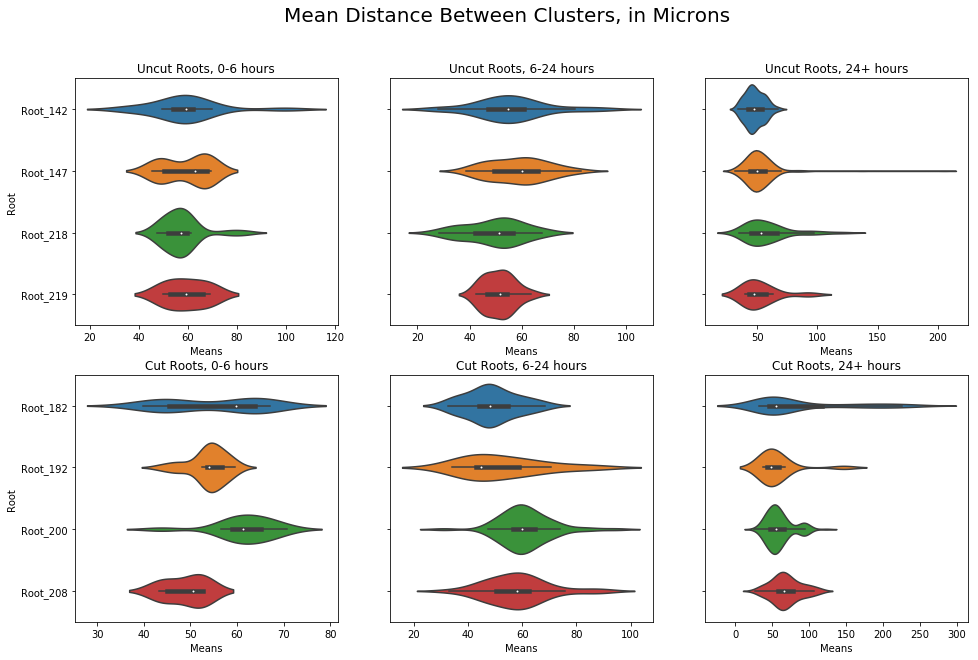

In [83]:
#https://towardsdatascience.com/subplots-in-matplotlib-a-guide-and-tool-for-planning-your-plots-7d63fa632857
fig = plt.figure(figsize=(16,10))

fig.add_subplot(2,3,1)
sns.violinplot(x='Means', y='Root', data=uncut_PairWise_early)
plt.title('Uncut Roots, 0-6 hours')

fig.add_subplot(2,3,4)
sns.violinplot(x='Means', y='Root', data=cut_PairWise_early)
plt.title('Cut Roots, 0-6 hours')

fig.add_subplot(2,3,2)
sns.violinplot(x='Means', y='Root', data=uncut_PairWise_middle).set(yticklabels=[], ylabel='')
plt.title('Uncut Roots, 6-24 hours')

fig.add_subplot(2,3,5)
sns.violinplot(x='Means', y='Root', data=cut_PairWise_middle).set(yticklabels=[], ylabel='')
plt.title('Cut Roots, 6-24 hours')

fig.add_subplot(2,3,3)
sns.violinplot(x='Means', y='Root', data=uncut_PairWise_late).set(yticklabels=[], ylabel='')
plt.title('Uncut Roots, 24+ hours')

fig.add_subplot(2,3,6)
sns.violinplot(x='Means', y='Root', data=cut_PairWise_late).set(yticklabels=[], ylabel='')
plt.title('Cut Roots, 24+ hours')


fig.suptitle('Mean Distance Between Clusters, in Microns', fontsize=20) 
fig.savefig('ViolinPlots_COM_Sena_Blocks.png')

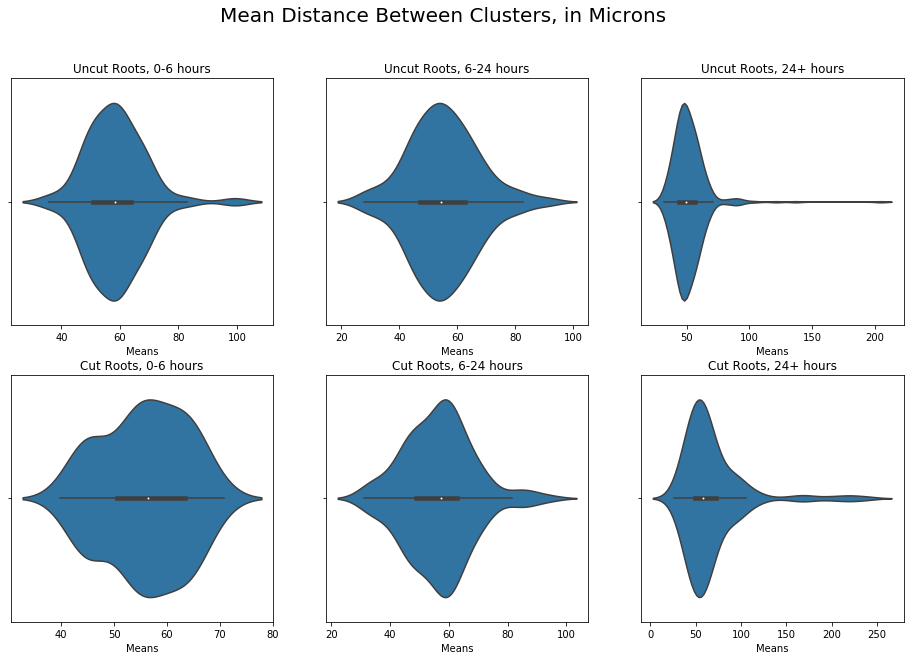

In [84]:
fig = plt.figure(figsize=(16,10))

fig.add_subplot(2,3,1)
sns.violinplot(x='Means', data=uncut_PairWise_early)
plt.title('Uncut Roots, 0-6 hours')

fig.add_subplot(2,3,4)
sns.violinplot(x='Means',  data=cut_PairWise_early)
plt.title('Cut Roots, 0-6 hours')

fig.add_subplot(2,3,2)
sns.violinplot(x='Means',  data=uncut_PairWise_middle).set(yticklabels=[], ylabel='')
plt.title('Uncut Roots, 6-24 hours')

fig.add_subplot(2,3,5)
sns.violinplot(x='Means',  data=cut_PairWise_middle).set(yticklabels=[], ylabel='')
plt.title('Cut Roots, 6-24 hours')

fig.add_subplot(2,3,3)
sns.violinplot(x='Means', data=uncut_PairWise_late).set(yticklabels=[], ylabel='')
plt.title('Uncut Roots, 24+ hours')

fig.add_subplot(2,3,6)
sns.violinplot(x='Means',data=cut_PairWise_late).set(yticklabels=[], ylabel='')
plt.title('Cut Roots, 24+ hours')


fig.suptitle('Mean Distance Between Clusters, in Microns', fontsize=20) 
fig.savefig('ViolinPlots_COM_Sena_Blocks_not_divided_by_root.png')

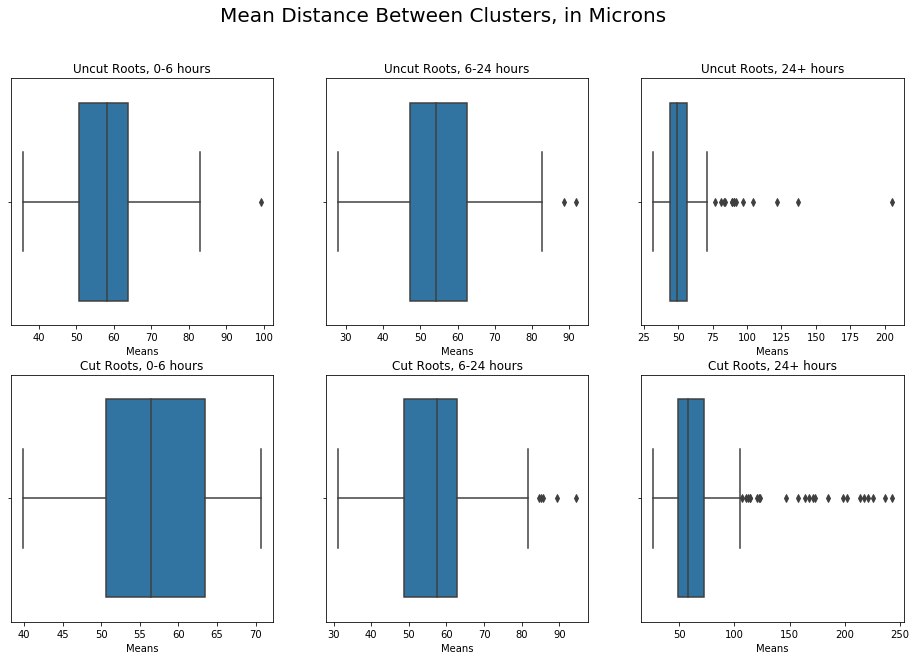

In [85]:
fig = plt.figure(figsize=(16,10))

fig.add_subplot(2,3,1)
sns.boxplot(x='Means', data=uncut_PairWise_early)
plt.title('Uncut Roots, 0-6 hours')

fig.add_subplot(2,3,4)
sns.boxplot(x='Means',  data=cut_PairWise_early)
plt.title('Cut Roots, 0-6 hours')

fig.add_subplot(2,3,2)
sns.boxplot(x='Means',  data=uncut_PairWise_middle).set(yticklabels=[], ylabel='')
plt.title('Uncut Roots, 6-24 hours')

fig.add_subplot(2,3,5)
sns.boxplot(x='Means',  data=cut_PairWise_middle).set(yticklabels=[], ylabel='')
plt.title('Cut Roots, 6-24 hours')

fig.add_subplot(2,3,3)
sns.boxplot(x='Means', data=uncut_PairWise_late).set(yticklabels=[], ylabel='')
plt.title('Uncut Roots, 24+ hours')

fig.add_subplot(2,3,6)
sns.boxplot(x='Means',data=cut_PairWise_late).set(yticklabels=[], ylabel='')
plt.title('Cut Roots, 24+ hours')


fig.suptitle('Mean Distance Between Clusters, in Microns', fontsize=20) 
fig.savefig('BoxPlots_COM_Sena_Blocks_not_divided_by_root.png')

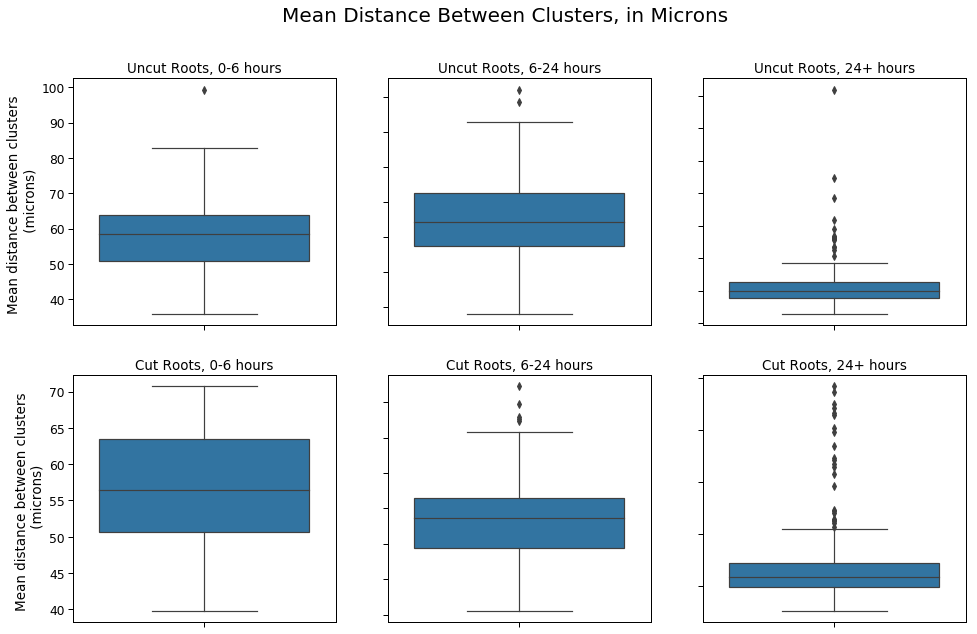

In [86]:
fig = plt.figure(figsize=(16,10))
sns.set_context("paper", font_scale=1.4) 

fig.add_subplot(2,3,1)
sns.boxplot(y='Means', data=uncut_PairWise_early).set(ylabel="Mean distance between clusters \n (microns)")
plt.title('Uncut Roots, 0-6 hours')

fig.add_subplot(2,3,4)
sns.boxplot(y='Means',  data=cut_PairWise_early).set(ylabel="Mean distance between clusters \n (microns)")
plt.title('Cut Roots, 0-6 hours')

fig.add_subplot(2,3,2)
sns.boxplot(y='Means',  data=uncut_PairWise_middle).set(yticklabels=[], ylabel='')
plt.title('Uncut Roots, 6-24 hours')

fig.add_subplot(2,3,5)
sns.boxplot(y='Means',  data=cut_PairWise_middle).set(yticklabels=[], ylabel='')
plt.title('Cut Roots, 6-24 hours')

fig.add_subplot(2,3,3)
sns.boxplot(y='Means', data=uncut_PairWise_late).set(yticklabels=[], ylabel='')
plt.title('Uncut Roots, 24+ hours')

fig.add_subplot(2,3,6)
sns.boxplot(y='Means',data=cut_PairWise_late).set(yticklabels=[], ylabel='')
plt.title('Cut Roots, 24+ hours')


fig.suptitle('Mean Distance Between Clusters, in Microns', fontsize=20) 

fig.savefig('BoxPlots_COM_not_divided_by_root_0_6_24_vertical.png')

In [87]:
## Can we redo this in 0-24 hours, 24-72 hours and 72+
##Early
uncut_PairWise_early = pd.concat([PD_142[PD_142['TimePoint']<=24*4],
                                PD_147[PD_147['TimePoint']<=24*4],
                                PD_218[PD_218['TimePoint']<=24*4],
                                PD_219[PD_219['TimePoint']<=24*4]],axis=0)



cut_PairWise_early = pd.concat([PD_182[PD_182['TimePoint']<=24*4],
                                PD_192[PD_192['TimePoint']<=24*4],
                                PD_200[PD_200['TimePoint']<=24*4],
                                PD_208[PD_208['TimePoint']<=24*4]],axis=0)

##Day 2
#uncut_PairWise_middle = PD_142[(PD_142['TimePoint']>24*4) &(PD_142['TimePoint']<=72*4)]

uncut_PairWise_middle = pd.concat([PD_142[(PD_142['TimePoint']>24*4) &(PD_142['TimePoint']<=72*4)],
                                PD_147[(PD_147['TimePoint']>24*4) &(PD_147['TimePoint']<=72*4)],
                                PD_218[(PD_218['TimePoint']>24*4) &(PD_218['TimePoint']<=72*4)],
                                PD_219[(PD_219['TimePoint']>24*4) &(PD_219['TimePoint']<=72*4)]],axis=0)


cut_PairWise_middle = pd.concat([PD_182[(PD_182['TimePoint']>24*4) &(PD_182['TimePoint']<=72*4)],
                                PD_192[(PD_192['TimePoint']>24*4) &(PD_192['TimePoint']<=72*4)],
                                PD_200[(PD_200['TimePoint']>24*4) &(PD_200['TimePoint']<=72*4)],
                                PD_208[(PD_208['TimePoint']>24*4) &(PD_208['TimePoint']<=72*4)]],axis=0)


#Day 3
#uncut_PairWise_late = pd.concat([PD_142[(PD_142['TimePoint']>48*4) &(PD_142['TimePoint']<=72*4)],
 ##                               PD_147[(PD_147['TimePoint']>48*4) &(PD_147['TimePoint']<=72*4)],
   #                             PD_218[(PD_218['TimePoint']>48*4) &(PD_218['TimePoint']<=72*4)],
    #                            PD_219[(PD_219['TimePoint']>48*4) &(PD_219['TimePoint']<=72*4)]],axis=0)
#

#cut_PairWise_late = pd.concat([PD_182[(PD_182['TimePoint']>48*4) &(PD_182['TimePoint']<=72*4)],
 #                               PD_192[(PD_192['TimePoint']>48*4) &(PD_192['TimePoint']<=72*4)],
  #                              PD_200[(PD_200['TimePoint']>48*4) &(PD_200['TimePoint']<=72*4)],
   #                             PD_208[(PD_208['TimePoint']>48*4) &(PD_208['TimePoint']<=72*4)]],axis=0)



#Day 4+

uncut_PairWise_late = pd.concat([PD_142[PD_142['TimePoint']>72*4],
                                PD_147[PD_147['TimePoint']>72*4],
                                PD_218[PD_218['TimePoint']>72*4],
                                PD_219[PD_219['TimePoint']>72*4]],axis=0)


cut_PairWise_late = pd.concat([PD_182[PD_182['TimePoint']>72*4],
                                PD_192[PD_192['TimePoint']>72*4],
                                PD_200[PD_200['TimePoint']>72*4],
                                PD_208[PD_208['TimePoint']>72*4]],axis=0)

## Changing to 0-24, 24-72, 72+

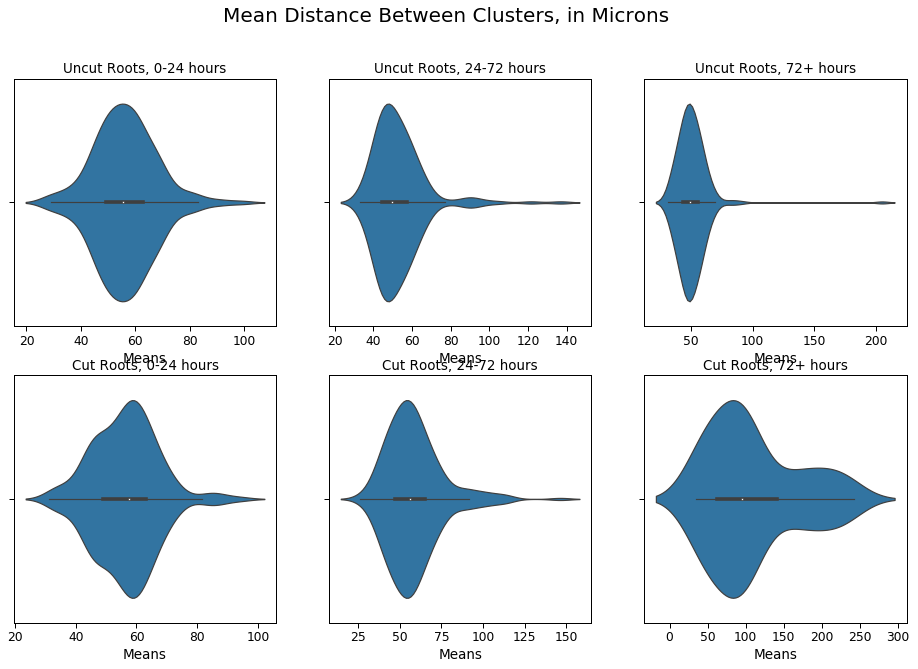

In [88]:
fig = plt.figure(figsize=(16,10))

fig.add_subplot(2,3,1)
sns.violinplot(x='Means', data=uncut_PairWise_early)
plt.title('Uncut Roots, 0-24 hours')

fig.add_subplot(2,3,4)
sns.violinplot(x='Means',  data=cut_PairWise_early)
plt.title('Cut Roots, 0-24 hours')

fig.add_subplot(2,3,2)
sns.violinplot(x='Means',  data=uncut_PairWise_middle).set(yticklabels=[], ylabel='')
plt.title('Uncut Roots, 24-72 hours')

fig.add_subplot(2,3,5)
sns.violinplot(x='Means',  data=cut_PairWise_middle).set(yticklabels=[], ylabel='')
plt.title('Cut Roots, 24-72 hours')

fig.add_subplot(2,3,3)
sns.violinplot(x='Means', data=uncut_PairWise_late).set(yticklabels=[], ylabel='')
plt.title('Uncut Roots, 72+ hours')

fig.add_subplot(2,3,6)
sns.violinplot(x='Means',data=cut_PairWise_late).set(yticklabels=[], ylabel='')
plt.title('Cut Roots, 72+ hours')


fig.suptitle('Mean Distance Between Clusters, in Microns', fontsize=20) 
fig.savefig('ViolinPlots_COM_not_divided_by_root_0_24_72.png')

In [89]:
uncut_PairWise_early.head()

,TimePoint,PairWise_Distances,Means,Medians,Root
0,1,"[65.20946796669944, 64.94397681848564, 79.8899...",70.014460,65.209468,Root_142
1,2,[59.78957681547212],59.789577,59.789577,Root_142
2,3,[57.87890120856733],57.878901,57.878901,Root_142
3,4,"[64.06744193252746, 45.02897900241575, 61.6494...",56.915288,61.649444,Root_142
4,5,[59.372619991773135],59.372620,59.372620,Root_142


Text(0.5, 1.0, 'Uncut Roots, 0-24 hours')

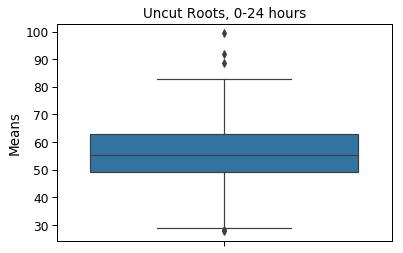

In [90]:
sns.boxplot(y='Means', data=uncut_PairWise_early)
plt.title('Uncut Roots, 0-24 hours')

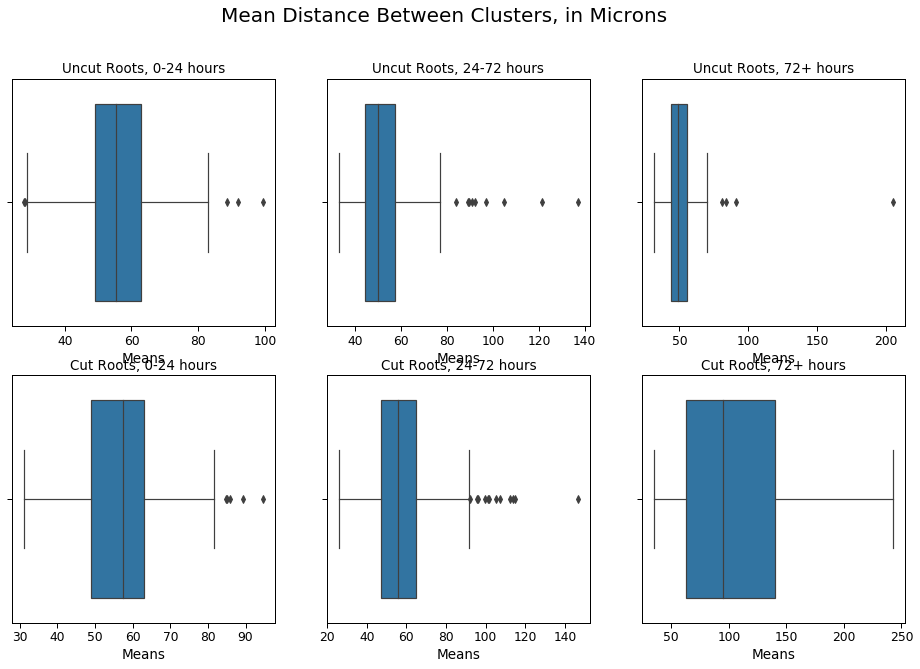

In [91]:
fig = plt.figure(figsize=(16,10))

fig.add_subplot(2,3,1)
sns.boxplot(x='Means', data=uncut_PairWise_early)
plt.title('Uncut Roots, 0-24 hours')

fig.add_subplot(2,3,4)
sns.boxplot(x='Means',  data=cut_PairWise_early)
plt.title('Cut Roots, 0-24 hours')

fig.add_subplot(2,3,2)
sns.boxplot(x='Means',  data=uncut_PairWise_middle).set(yticklabels=[], ylabel='')
plt.title('Uncut Roots, 24-72 hours')

fig.add_subplot(2,3,5)
sns.boxplot(x='Means',  data=cut_PairWise_middle).set(yticklabels=[], ylabel='')
plt.title('Cut Roots, 24-72 hours')

fig.add_subplot(2,3,3)
sns.boxplot(x='Means', data=uncut_PairWise_late).set(yticklabels=[], ylabel='')
plt.title('Uncut Roots, 72+ hours')

fig.add_subplot(2,3,6)
sns.boxplot(x='Means',data=cut_PairWise_late).set(yticklabels=[], ylabel='')
plt.title('Cut Roots, 72+ hours')


fig.suptitle('Mean Distance Between Clusters, in Microns', fontsize=20) 
fig.savefig('BoxPlots_COM_not_divided_by_root_0_24_72.png')

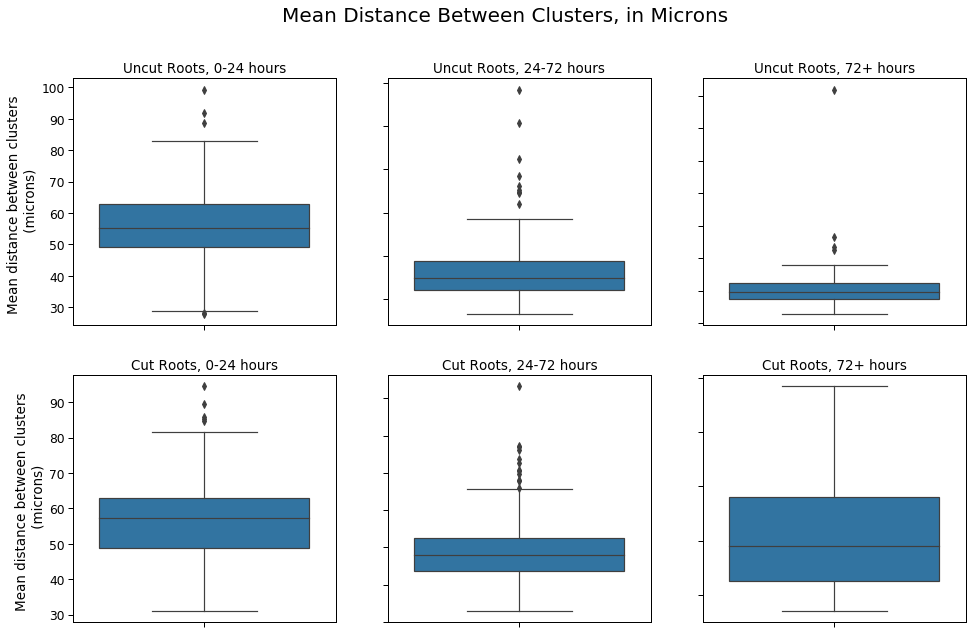

In [92]:
fig = plt.figure(figsize=(16,10))
sns.set_context("paper", font_scale=1.4) 
fig.add_subplot(2,3,1)
sns.boxplot(y='Means', data=uncut_PairWise_early).set(ylabel="Mean distance between clusters \n (microns)")

plt.title('Uncut Roots, 0-24 hours')

fig.add_subplot(2,3,4)
sns.boxplot(y='Means',  data=cut_PairWise_early).set(ylabel="Mean distance between clusters \n (microns)")
plt.title('Cut Roots, 0-24 hours')

fig.add_subplot(2,3,2)
sns.boxplot(y='Means',  data=uncut_PairWise_middle).set(yticklabels=[], ylabel='')
plt.title('Uncut Roots, 24-72 hours')

fig.add_subplot(2,3,5)
sns.boxplot(y='Means',  data=cut_PairWise_middle).set(yticklabels=[], ylabel='')
plt.title('Cut Roots, 24-72 hours')

fig.add_subplot(2,3,3)
sns.boxplot(y='Means', data=uncut_PairWise_late).set(yticklabels=[], ylabel='')
plt.title('Uncut Roots, 72+ hours')

fig.add_subplot(2,3,6)
sns.boxplot(y='Means',data=cut_PairWise_late).set(yticklabels=[], ylabel='')
plt.title('Cut Roots, 72+ hours')


fig.suptitle('Mean Distance Between Clusters, in Microns', fontsize=20) 
fig.savefig('BoxPlots_COM_not_divided_by_root_0_24_72_vertical.png')

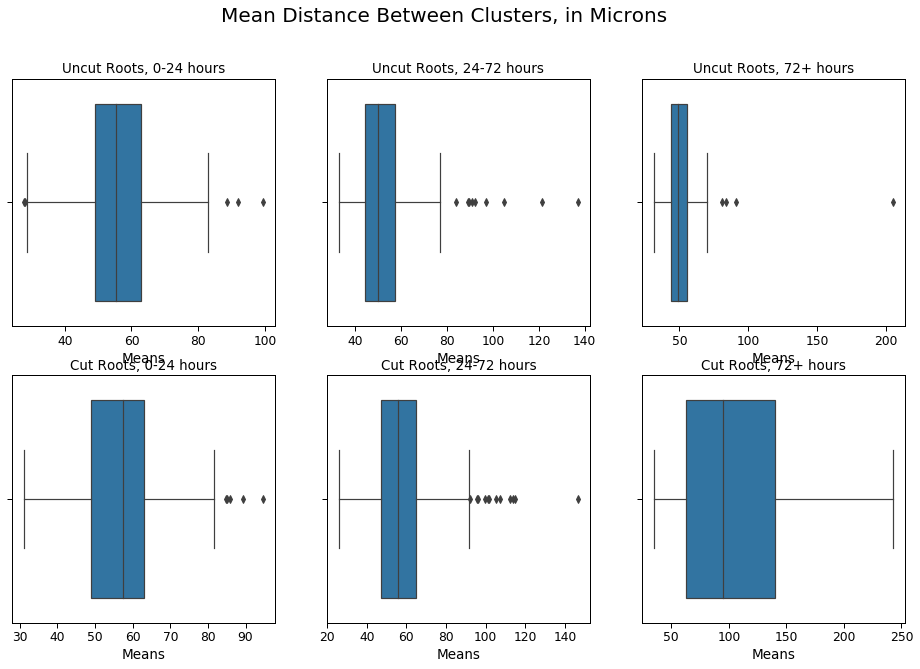

In [93]:
fig = plt.figure(figsize=(16,10))

fig.add_subplot(2,3,1)
sns.boxplot(x='Means', data=uncut_PairWise_early)
plt.title('Uncut Roots, 0-24 hours')

fig.add_subplot(2,3,4)
sns.boxplot(x='Means',  data=cut_PairWise_early)
plt.title('Cut Roots, 0-24 hours')

fig.add_subplot(2,3,2)
sns.boxplot(x='Means',  data=uncut_PairWise_middle).set(yticklabels=[], ylabel='')
plt.title('Uncut Roots, 24-72 hours')

fig.add_subplot(2,3,5)
sns.boxplot(x='Means',  data=cut_PairWise_middle).set(yticklabels=[], ylabel='')
plt.title('Cut Roots, 24-72 hours')

fig.add_subplot(2,3,3)
sns.boxplot(x='Means', data=uncut_PairWise_late).set(yticklabels=[], ylabel='')
plt.title('Uncut Roots, 72+ hours')

fig.add_subplot(2,3,6)
sns.boxplot(x='Means',data=cut_PairWise_late).set(yticklabels=[], ylabel='')
plt.title('Cut Roots, 72+ hours')


fig.suptitle('Mean Distance Between Clusters, in Microns', fontsize=20) 
fig.savefig('BoxPlots_COM_not_divided_by_root_0_24_72.png')

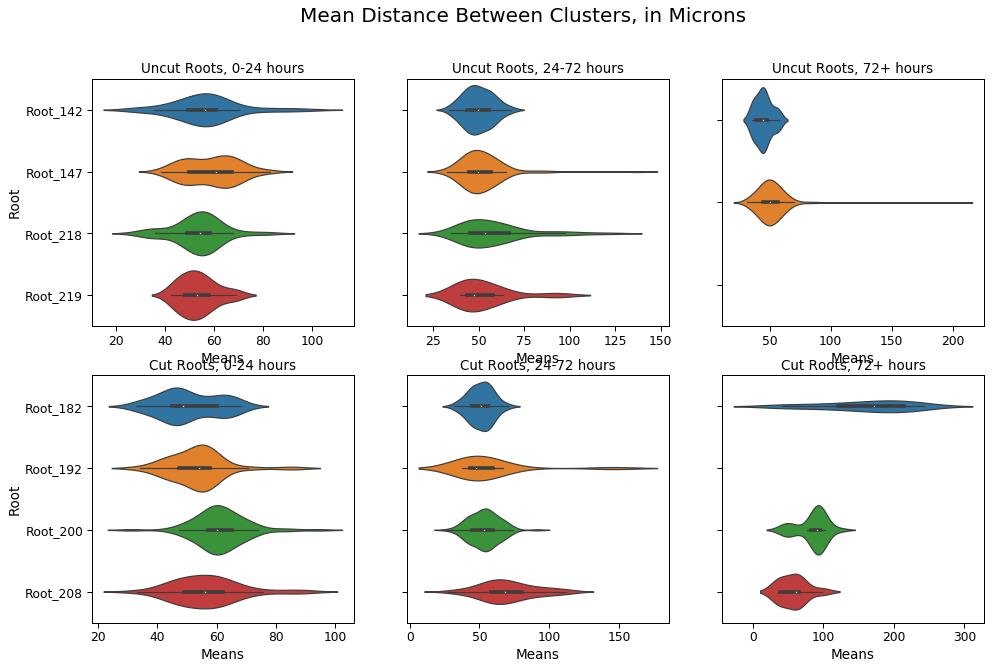

In [94]:
#https://towardsdatascience.com/subplots-in-matplotlib-a-guide-and-tool-for-planning-your-plots-7d63fa632857
fig = plt.figure(figsize=(16,10))

fig.add_subplot(2,3,1)
sns.violinplot(x='Means', y='Root', data=uncut_PairWise_early)
plt.title('Uncut Roots, 0-24 hours')

fig.add_subplot(2,3,4)
sns.violinplot(x='Means', y='Root', data=cut_PairWise_early)
plt.title('Cut Roots, 0-24 hours')

fig.add_subplot(2,3,2)
sns.violinplot(x='Means', y='Root', data=uncut_PairWise_middle).set(yticklabels=[], ylabel='')
plt.title('Uncut Roots, 24-72 hours')

fig.add_subplot(2,3,5)
sns.violinplot(x='Means', y='Root', data=cut_PairWise_middle).set(yticklabels=[], ylabel='')
plt.title('Cut Roots, 24-72 hours')

fig.add_subplot(2,3,3)
sns.violinplot(x='Means', y='Root', data=uncut_PairWise_late).set(yticklabels=[], ylabel='')
plt.title('Uncut Roots, 72+ hours')

fig.add_subplot(2,3,6)
sns.violinplot(x='Means', y='Root', data=cut_PairWise_late).set(yticklabels=[], ylabel='')
plt.title('Cut Roots, 72+ hours')


fig.suptitle('Mean Distance Between Clusters, in Microns', fontsize=20) 
fig.savefig('ViolinPlots_COM_root_0_24_72.png')

### Giovani's edits Feb 3 2022

In [95]:
## Can we redo this in 0-6, 6-24, 24-72, 72-120
##Group 1
uncut_PairWise_less_than_6 = pd.concat([PD_142[PD_142['TimePoint']<=6*4],
                                PD_147[PD_147['TimePoint']<=6*4],
                                PD_218[PD_218['TimePoint']<=6*4],
                                PD_219[PD_219['TimePoint']<=6*4]],axis=0).reset_index()



cut_PairWise_less_than_6 = pd.concat([PD_182[PD_182['TimePoint']<=6*4],
                                PD_192[PD_192['TimePoint']<=6*4],
                                PD_200[PD_200['TimePoint']<=6*4],
                                PD_208[PD_208['TimePoint']<=6*4]],axis=0).reset_index()

##Group 2
#6-24
#uncut_PairWise_middle = PD_142[(PD_142['TimePoint']>24*4) &(PD_142['TimePoint']<=72*4)]

uncut_PairWise_6_24 = pd.concat([PD_142[(PD_142['TimePoint']>6*4) &(PD_142['TimePoint']<=24*4)],
                                PD_147[(PD_147['TimePoint']>6*4) &(PD_147['TimePoint']<=24*4)],
                                PD_218[(PD_218['TimePoint']>6*4) &(PD_218['TimePoint']<=24*4)],
                                PD_219[(PD_219['TimePoint']>6*4) &(PD_219['TimePoint']<=24*4)]],axis=0).reset_index()


cut_PairWise_6_24 = pd.concat([PD_182[(PD_182['TimePoint']>6*4) &(PD_182['TimePoint']<=24*4)],
                                PD_192[(PD_192['TimePoint']>6*4) &(PD_192['TimePoint']<=24*4)],
                                PD_200[(PD_200['TimePoint']>6*4) &(PD_200['TimePoint']<=24*4)],
                                PD_208[(PD_208['TimePoint']>6*4) &(PD_208['TimePoint']<=24*4)]],axis=0).reset_index()


# Group 3
# 24-72 hours
uncut_PairWise_24_72 = pd.concat([PD_142[(PD_142['TimePoint']>24*4) &(PD_142['TimePoint']<=72*4)],
                                PD_147[(PD_147['TimePoint']>24*4) &(PD_147['TimePoint']<=72*4)],
                                PD_218[(PD_218['TimePoint']>24*4) &(PD_218['TimePoint']<=72*4)],
                                PD_219[(PD_219['TimePoint']>24*4) &(PD_219['TimePoint']<=72*4)]],axis=0).reset_index()


cut_PairWise_24_72 = pd.concat([PD_182[(PD_182['TimePoint']>24*4) &(PD_182['TimePoint']<=72*4)],
                              PD_192[(PD_192['TimePoint']>24*4) &(PD_192['TimePoint']<=72*4)],
                              PD_200[(PD_200['TimePoint']>24*4) &(PD_200['TimePoint']<=72*4)],
                              PD_208[(PD_208['TimePoint']>24*4) &(PD_208['TimePoint']<=72*4)]],axis=0).reset_index()



# Group 4
# 72+ hours

uncut_PairWise_greater_than_72 = pd.concat([PD_142[PD_142['TimePoint']>72*4],
                                PD_147[PD_147['TimePoint']>72*4],
                                PD_218[PD_218['TimePoint']>72*4],
                                PD_219[PD_219['TimePoint']>72*4]],axis=0).reset_index()


cut_PairWise_greater_than_72 = pd.concat([PD_182[PD_182['TimePoint']>72*4],
                                PD_192[PD_192['TimePoint']>72*4],
                                PD_200[PD_200['TimePoint']>72*4],
                                PD_208[PD_208['TimePoint']>72*4]],axis=0).reset_index()

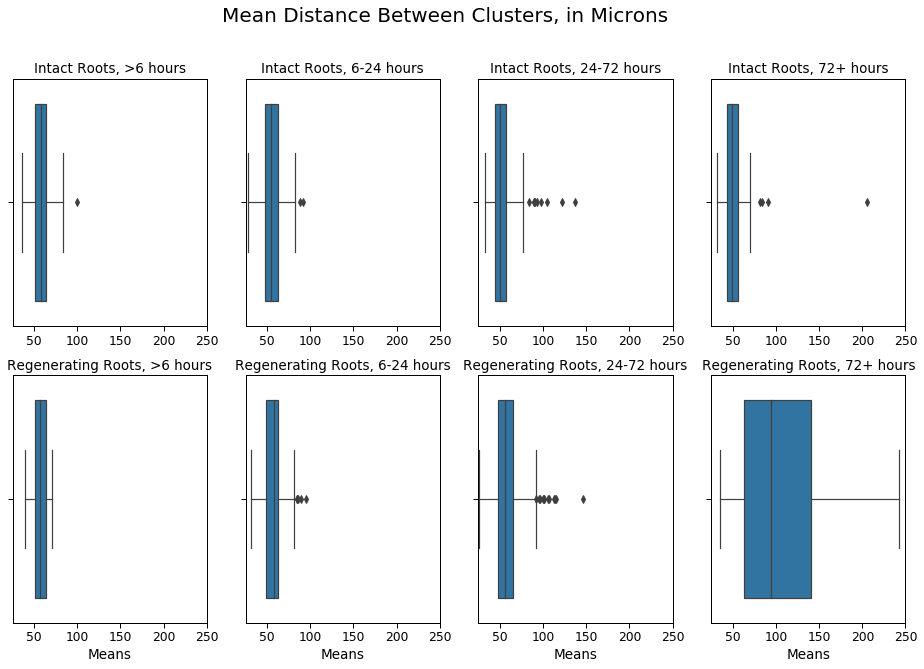

In [96]:
fig = plt.figure(figsize=(16,10))

fig.add_subplot(2,4,1)
sns.boxplot(x='Means', data=uncut_PairWise_less_than_6).set(xlabel='')
plt.xlim([25,250])
plt.title('Intact Roots, >6 hours')

fig.add_subplot(2,4,5)
sns.boxplot(x='Means',  data=cut_PairWise_less_than_6)
plt.xlim([25,250])
plt.title('Regenerating Roots, >6 hours')

fig.add_subplot(2,4,2)
sns.boxplot(x='Means',  data=uncut_PairWise_6_24).set(yticklabels=[], ylabel='' , xlabel='')
plt.xlim([25,250])
plt.title('Intact Roots, 6-24 hours')

fig.add_subplot(2,4,6)
sns.boxplot(x='Means',  data=cut_PairWise_6_24).set(yticklabels=[], ylabel='')
plt.xlim([25,250])
plt.title('Regenerating Roots, 6-24 hours')

fig.add_subplot(2,4,3)
sns.boxplot(x='Means', data=uncut_PairWise_24_72).set(yticklabels=[], ylabel='', xlabel='')
plt.xlim([25,250])
plt.title('Intact Roots, 24-72 hours')

fig.add_subplot(2,4,7)
sns.boxplot(x='Means',data=cut_PairWise_24_72).set(yticklabels=[], ylabel='')
plt.xlim([25,250])
plt.title('Regenerating Roots, 24-72 hours')


fig.add_subplot(2,4,4)
sns.boxplot(x='Means', data=uncut_PairWise_greater_than_72).set(yticklabels=[], ylabel='', xlabel='')
plt.xlim([25,250])
plt.title('Intact Roots, 72+ hours')

fig.add_subplot(2,4,8)
sns.boxplot(x='Means',data=cut_PairWise_greater_than_72).set(yticklabels=[], ylabel='')
plt.xlim([25,250])
plt.title('Regenerating Roots, 72+ hours')

fig.suptitle('Mean Distance Between Clusters, in Microns', fontsize=20) 
fig.savefig('Feb_2022_Fig_6_0_6_24_72.png')
fig.savefig('Feb_2022_Fig_6_0_6_24_72.pdf')

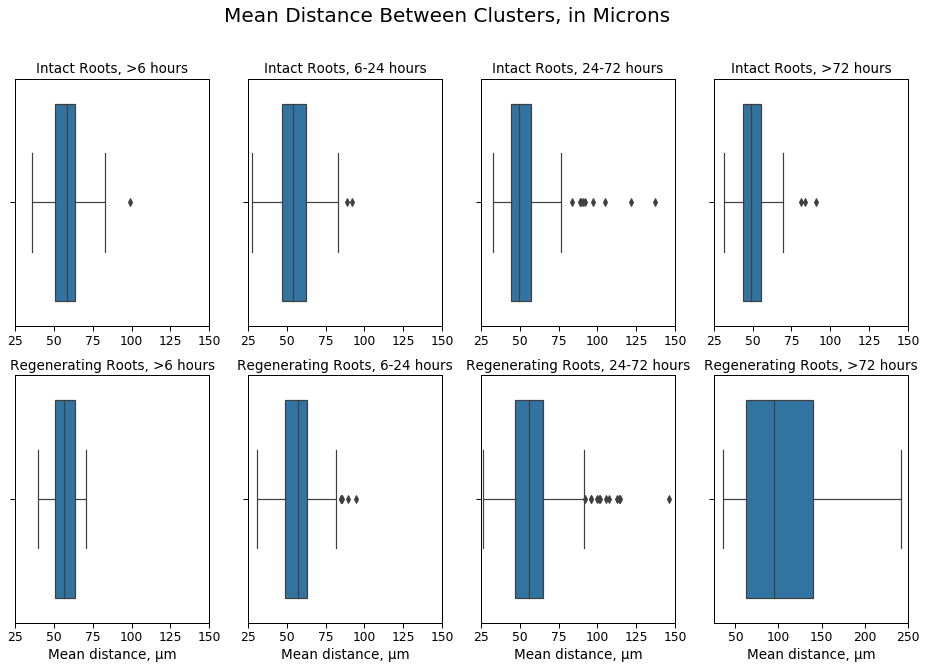

In [97]:
from matplotlib import text

fig = plt.figure(figsize=(16,10))


x_low=25
x_high=150

fig.add_subplot(2,4,1)
sns.boxplot(x='Means', data=uncut_PairWise_less_than_6).set(xlabel='')
plt.xlim([x_low,x_high])
plt.title('Intact Roots, >6 hours')

fig.add_subplot(2,4,5)
sns.boxplot(x='Means',  data=cut_PairWise_less_than_6).set(xlabel='Mean distance, \u03bcm')
plt.xlim([x_low,x_high])
plt.title('Regenerating Roots, >6 hours')

fig.add_subplot(2,4,2)
sns.boxplot(x='Means',  data=uncut_PairWise_6_24).set(yticklabels=[], ylabel='' , xlabel='')
plt.xlim([x_low,x_high])
plt.title('Intact Roots, 6-24 hours')

fig.add_subplot(2,4,6)
sns.boxplot(x='Means',  data=cut_PairWise_6_24).set(yticklabels=[], ylabel='', xlabel='Mean distance, \u03bcm')
plt.xlim([x_low,x_high])
plt.title('Regenerating Roots, 6-24 hours')

fig.add_subplot(2,4,3)
sns.boxplot(x='Means', data=uncut_PairWise_24_72).set(yticklabels=[], ylabel='', xlabel='')
plt.xlim([x_low,x_high])
plt.title('Intact Roots, 24-72 hours')

fig.add_subplot(2,4,7)
sns.boxplot(x='Means',data=cut_PairWise_24_72).set(yticklabels=[], ylabel='', xlabel='Mean distance, \u03bcm')

plt.xlim([x_low,x_high])
plt.title('Regenerating Roots, 24-72 hours')


fig.add_subplot(2,4,4)
sns.boxplot(x='Means', data=uncut_PairWise_greater_than_72).set(yticklabels=[], ylabel='', xlabel='')
plt.xlim([x_low,x_high])
plt.title('Intact Roots, >72 hours')

fig.add_subplot(2,4,8)
sns.boxplot(x='Means',data=cut_PairWise_greater_than_72).set(yticklabels=[], ylabel='', xlabel='Mean distance, \u03bcm')
plt.xlim([x_low,250])
plt.title('Regenerating Roots, >72 hours')

fig.suptitle('Mean Distance Between Clusters, in Microns', fontsize=20) 
fig.savefig('Feb_2022_Fig_6_0_6_24_72.png')
fig.savefig('Feb_2022_Fig_6_0_6_24_72.pdf')

## Make histograms of the pairwise distances and check them by poisson?
### Do a histogram of the roots seperately
### Histogram the roots, cut and uncut, combined


##### Want to explode out the list of PairWise_Distances so that I just have a big mess o' pairwise distances


In [98]:
uncut_PairWise_less_than_6.head()

,index,TimePoint,PairWise_Distances,Means,Medians,Root
0,0,1,"[65.20946796669944, 64.94397681848564, 79.8899...",70.014460,65.209468,Root_142
1,1,2,[59.78957681547212],59.789577,59.789577,Root_142
2,2,3,[57.87890120856733],57.878901,57.878901,Root_142
3,3,4,"[64.06744193252746, 45.02897900241575, 61.6494...",56.915288,61.649444,Root_142
4,4,5,[59.372619991773135],59.372620,59.372620,Root_142


In [99]:
uncut_PairWise_less_than_6

,index,TimePoint,PairWise_Distances,Means,Medians,Root
0,0,1,"[65.20946796669944, 64.94397681848564, 79.8899...",70.014460,65.209468,Root_142
1,1,2,[59.78957681547212],59.789577,59.789577,Root_142
2,2,3,[57.87890120856733],57.878901,57.878901,Root_142
3,3,4,"[64.06744193252746, 45.02897900241575, 61.6494...",56.915288,61.649444,Root_142
4,4,5,[59.372619991773135],59.372620,59.372620,Root_142
5,5,6,[63.62352747652047],63.623527,63.623527,Root_142
6,6,7,[35.730584426087276],35.730584,35.730584,Root_142
7,7,8,[38.84049855820596],38.840499,38.840499,Root_142
8,8,9,NaN,NaN,NaN,Root_142
9,9,10,[52.45681040945336],52.456810,52.456810,Root_142


In [100]:
uncut_PairWise_less_than_6.PairWise_Distances[0]

array([65.20946797, 64.94397682, 79.88993405])

In [101]:
## Can we redo this in 0-6, 6-24, 24-72, 72-120
##Group 1
uncut_PairWise_less_than_6 = pd.concat([PD_142[PD_142['TimePoint']<=6*4],
                                PD_147[PD_147['TimePoint']<=6*4],
                                PD_218[PD_218['TimePoint']<=6*4],
                                PD_219[PD_219['TimePoint']<=6*4]],axis=0).reset_index()



cut_PairWise_less_than_6 = pd.concat([PD_182[PD_182['TimePoint']<=6*4],
                                PD_192[PD_192['TimePoint']<=6*4],
                                PD_200[PD_200['TimePoint']<=6*4],
                                PD_208[PD_208['TimePoint']<=6*4]],axis=0).reset_index()

##Group 2
#6-24
#uncut_PairWise_middle = PD_142[(PD_142['TimePoint']>24*4) &(PD_142['TimePoint']<=72*4)]

uncut_PairWise_6_24 = pd.concat([PD_142[(PD_142['TimePoint']>6*4) &(PD_142['TimePoint']<=24*4)],
                                PD_147[(PD_147['TimePoint']>6*4) &(PD_147['TimePoint']<=24*4)],
                                PD_218[(PD_218['TimePoint']>6*4) &(PD_218['TimePoint']<=24*4)],
                                PD_219[(PD_219['TimePoint']>6*4) &(PD_219['TimePoint']<=24*4)]],axis=0).reset_index()


cut_PairWise_6_24 = pd.concat([PD_182[(PD_182['TimePoint']>6*4) &(PD_182['TimePoint']<=24*4)],
                                PD_192[(PD_192['TimePoint']>6*4) &(PD_192['TimePoint']<=24*4)],
                                PD_200[(PD_200['TimePoint']>6*4) &(PD_200['TimePoint']<=24*4)],
                                PD_208[(PD_208['TimePoint']>6*4) &(PD_208['TimePoint']<=24*4)]],axis=0).reset_index()


# Group 3
# 24-72 hours
uncut_PairWise_24_72 = pd.concat([PD_142[(PD_142['TimePoint']>24*4) &(PD_142['TimePoint']<=72*4)],
                                PD_147[(PD_147['TimePoint']>24*4) &(PD_147['TimePoint']<=72*4)],
                                PD_218[(PD_218['TimePoint']>24*4) &(PD_218['TimePoint']<=72*4)],
                                PD_219[(PD_219['TimePoint']>24*4) &(PD_219['TimePoint']<=72*4)]],axis=0).reset_index()


cut_PairWise_24_72 = pd.concat([PD_182[(PD_182['TimePoint']>24*4) &(PD_182['TimePoint']<=72*4)],
                              PD_192[(PD_192['TimePoint']>24*4) &(PD_192['TimePoint']<=72*4)],
                              PD_200[(PD_200['TimePoint']>24*4) &(PD_200['TimePoint']<=72*4)],
                              PD_208[(PD_208['TimePoint']>24*4) &(PD_208['TimePoint']<=72*4)]],axis=0).reset_index()



# Group 4
# 72+ hours

uncut_PairWise_greater_than_72 = pd.concat([PD_142[PD_142['TimePoint']>72*4],
                                PD_147[PD_147['TimePoint']>72*4],
                                PD_218[PD_218['TimePoint']>72*4],
                                PD_219[PD_219['TimePoint']>72*4]],axis=0).reset_index()


cut_PairWise_greater_than_72 = pd.concat([PD_182[PD_182['TimePoint']>72*4],
                                PD_192[PD_192['TimePoint']>72*4],
                                PD_200[PD_200['TimePoint']>72*4],
                                PD_208[PD_208['TimePoint']>72*4]],axis=0).reset_index()

In [102]:
uncut_PairWise_less_than_6_PDs = uncut_PairWise_less_than_6.PairWise_Distances.dropna().explode().to_frame()
cut_PairWise_less_than_6_PDs = cut_PairWise_less_than_6.PairWise_Distances.dropna().explode().to_frame()

uncut_PairWise_6_24_PDs = uncut_PairWise_6_24.PairWise_Distances.dropna().explode().to_frame()
cut_PairWise_6_24_PDs = cut_PairWise_6_24.PairWise_Distances.dropna().explode().to_frame()

uncut_PairWise_24_72_PDs = uncut_PairWise_24_72.PairWise_Distances.dropna().explode().to_frame()
cut_PairWise_24_72_PDs = cut_PairWise_24_72 .PairWise_Distances.dropna().explode().to_frame()

uncut_PairWise_greater_than_72_PDs = uncut_PairWise_greater_than_72.PairWise_Distances.dropna().explode().to_frame()
cut_PairWise_greater_than_72_PDs = cut_PairWise_greater_than_72.PairWise_Distances.dropna().explode().to_frame()

AttributeError: 'Series' object has no attribute 'explode'

In [ ]:
uncut_PDs = pd.concat(([uncut_PairWise_less_than_6_PDs,uncut_PairWise_6_24_PDs,uncut_PairWise_24_72_PDs,uncut_PairWise_greater_than_72_PDs]))
cut_PDs = pd.concat(([cut_PairWise_less_than_6_PDs,cut_PairWise_6_24_PDs,cut_PairWise_24_72_PDs,cut_PairWise_greater_than_72_PDs]))
all_PDs_max = pd.concat(([uncut_PDs, cut_PDs])).max()

In [ ]:
np.ceil(all_PDs_max[0])

In [ ]:
uncut_PairWise_greater_than_72_PDs

In [ ]:
cut_PDs

In [ ]:
fig = plt.figure(constrained_layout=True, figsize=(20,9))
sns.set_context("paper", font_scale=2.5) 
axes_min = 0
axes_max = 280
bins = list(range(axes_min,axes_max,5))
gs = GridSpec(5, 14, figure=fig)
ax1 = fig.add_subplot(gs[:, 0:6])
ax1 = sns.distplot(cut_PDs.PairWise_Distances, kde=True, rug=False)  #do a kernel density estimation
ax1 = sns.distplot(uncut_PDs.PairWise_Distances, kde=True, rug=False, ax=ax1)   #add second axis to the plot
ax1.set(xlabel = "Distance (microns)", ylabel='Frequency', title='Pairwise Distance Between Clusters', xlim=(axes_min,axes_max)) #set the labels
#ax1.get_lines()[0].remove()
#ax1.get_lines()[0].remove()
ax1.legend(labels = ['Regenerating Roots', 'Intact Roots'], fontsize=22) #set the legend
ax1.text(0.065, 0.9, 'A',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax1.transAxes,
        color='black', fontsize=30)


#ax2
ax2 = fig.add_subplot(gs[0:2,6:10])
ax2 = sns.distplot(cut_PairWise_less_than_6_PDs.PairWise_Distances, kde=True, rug=False)  #do a kernel density estimation
ax2 =sns.distplot(uncut_PairWise_less_than_6_PDs.PairWise_Distances, kde=True, rug=False, ax=ax2)   #add second axis to the plot
ax2.set(xlabel = '', ylabel='Frequency', title=' < 6 hours', xlim=(axes_min,axes_max)) #set the labels
#ax2.get_lines()[0].remove()
#ax2.get_lines()[0].remove()
ax2.text(0.075, 0.8, 'B',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax2.transAxes,
        color='black', fontsize=30)
#ax2.legend(labels = ['Regenerating Roots', 'Intact Roots'], fontsize=18) #set the legend

#ax3
ax3 = fig.add_subplot(gs[3:, 6:10])
ax3 = sns.distplot(cut_PairWise_6_24_PDs.PairWise_Distances, kde=True, rug=False)  #do a kernel density estimation
ax3 = sns.distplot(uncut_PairWise_6_24_PDs.PairWise_Distances, kde=True, rug=False, ax=ax3)   #add second axis to the plot
ax3.set(xlabel = "Distance (microns)", ylabel='Frequency', title='24-72 hours', xlim=(axes_min,axes_max)) #set the labels
#ax3.get_lines()[0].remove()
#ax3.get_lines()[0].remove()
ax3.text(0.075, 0.8, 'D',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax3.transAxes,
        color='black', fontsize=30)
#ax3.legend(labels = ['Regenerating Roots', 'Intact Roots'], fontsize=18) #set the legend

#ax4
ax4 = fig.add_subplot(gs[0:2, 10:])
ax4 = sns.distplot(cut_PairWise_24_72_PDs.PairWise_Distances, kde=True, rug=False)  #do a kernel density estimation
ax4=sns.distplot(uncut_PairWise_24_72_PDs.PairWise_Distances, kde=True, rug=False,ax=ax4)   #add second axis to the plot
ax4.set(xlabel = '', ylabel='Frequency', title='6-24 hours', xlim=(axes_min,axes_max)) #set the labels
#ax4.get_lines()[0].remove()
#ax4.get_lines()[0].remove()
ax4.text(0.075, 0.8, 'C',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax4.transAxes,
        color='black', fontsize=30)
#ax4.legend(labels = ['Regenerating Roots', 'Intact Roots'], fontsize=18) #set the legend


#ax5
ax5 = fig.add_subplot(gs[3:, 10:])
ax5 = sns.distplot(cut_PairWise_greater_than_72_PDs.PairWise_Distances,bins=bins, kde=True, rug=False)  #do a kernel density estimation
ax5 = sns.distplot(uncut_PairWise_greater_than_72_PDs.PairWise_Distances,  bins=bins,kde=True, rug=False, ax=ax5)   #add second axis to the plot
ax5.set(xlabel = "Distance (microns)", ylabel='Frequency', title='Greater than 72 hours', xlim=(axes_min,axes_max)) #set the labels
#ax5.get_lines()[0].remove()
#ax5.get_lines()[0].remove()
ax5.text(0.075, 0.8, 'E',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax5.transAxes,
        color='black', fontsize=30)

#there has got to be a better way to do this then just calling the same function twice, but hey it works, and I'm busy


#ax5.legend(labels = ['Regenerating Roots', 'Intact Roots'], fontsize=18) #set the legend
#fig.suptitle("Cell Divisions Per Frame")


plt.show()

#fig.savefig('figure_4_May_13_2022_with_fit_lines.png', facecolor='w', edgecolor='w')
#fig.savefig('figure_4_May_13_2022_with_fit_lines.pdf', facecolor='w', edgecolor='w')

In [ ]:
bins

In [ ]:
#let's try the poisson statistics
from scipy.stats import poisson
mu_uncut = uncut_PDs.PairWise_Distances.mean()
mu_cut = cut_PDs.PairWise_Distances.mean()

fig = plt.figure(constrained_layout=True, figsize=(20,9))
sns.set_context("paper", font_scale=2.5) 
axes_min = 0
axes_max = 280
binwidth=5
bins = list(range(axes_min,axes_max,binwidth))
n_uncut = 1
n_cut=1
new_bins = np.array(bins)

gs = GridSpec(5, 14, figure=fig)
###########################################
ax1 = fig.add_subplot(gs[:, 0:6])
ax1 = sns.distplot(cut_PDs.PairWise_Distances, bins = bins,kde=True, rug=False)  #do a kernel density estimation
ax1 = sns.distplot(uncut_PDs.PairWise_Distances,bins = bins, kde=True, rug=False, ax=ax1)   #add second axis to the plot
ax1.set(xlabel = "Distance (microns)", ylabel='Frequency', title='Pairwise Distance Between Clusters', xlim=(axes_min,axes_max)) #set the labels


#plt.plot(new_bins + binwidth/2 , n_uncut*(poisson.cdf(new_bins+binwidth,mu_uncut) - poisson.cdf(new_bins,mu_uncut)), 'bx-')
#ax1.get_lines()[0].remove()
#ax1.get_lines()[0].remove()
ax1.legend(labels = ['Regenerating Roots', 'Intact Roots'], fontsize=22) #set the legend
ax1.text(0.065, 0.9, 'A',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax1.transAxes,
        color='black', fontsize=30)

##################################################################################
#ax2
ax2 = fig.add_subplot(gs[0:2,6:10])
ax2 = sns.distplot(cut_PairWise_less_than_6_PDs.PairWise_Distances,bins = bins, kde=True, rug=False)  #do a kernel density estimation
ax2 =sns.distplot(uncut_PairWise_less_than_6_PDs.PairWise_Distances,bins = bins, kde=True, rug=False, ax=ax2)   #add second axis to the plot
ax2.set(xlabel = '', ylabel='Frequency', title=' < 6 hours', xlim=(axes_min,axes_max)) #set the labels
#ax2.get_lines()[0].remove()
#ax2.get_lines()[0].remove()
ax2.text(0.075, 0.8, 'B',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax2.transAxes,
        color='black', fontsize=30)
#ax2.legend(labels = ['Regenerating Roots', 'Intact Roots'], fontsize=18) #set the legend
##################################################################################
#ax3
ax3 = fig.add_subplot(gs[3:, 6:10])
ax3 = sns.distplot(cut_PairWise_6_24_PDs.PairWise_Distances,bins = bins, kde=True, rug=False)  #do a kernel density estimation
ax3 = sns.distplot(uncut_PairWise_6_24_PDs.PairWise_Distances,bins = bins, kde=True, rug=False, ax=ax3)   #add second axis to the plot
ax3.set(xlabel = "Distance (microns)", ylabel='Frequency', title='24-72 hours', xlim=(axes_min,axes_max)) #set the labels
#ax3.get_lines()[0].remove()
#ax3.get_lines()[0].remove()
ax3.text(0.075, 0.8, 'D',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax3.transAxes,
        color='black', fontsize=30)
#ax3.legend(labels = ['Regenerating Roots', 'Intact Roots'], fontsize=18) #set the legend
#######################################################################################################
#ax4
ax4 = fig.add_subplot(gs[0:2, 10:])
ax4 = sns.distplot(cut_PairWise_24_72_PDs.PairWise_Distances,bins = bins, kde=True, rug=False)  #do a kernel density estimation
ax4=sns.distplot(uncut_PairWise_24_72_PDs.PairWise_Distances,bins = bins, kde=True, rug=False,ax=ax4)   #add second axis to the plot
ax4.set(xlabel = '', ylabel='Frequency', title='6-24 hours', xlim=(axes_min,axes_max)) #set the labels
#ax4.get_lines()[0].remove()
#ax4.get_lines()[0].remove()
ax4.text(0.075, 0.8, 'C',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax4.transAxes,
        color='black', fontsize=30)
#ax4.legend(labels = ['Regenerating Roots', 'Intact Roots'], fontsize=18) #set the legend

#########################################################################################################
#ax5
ax5 = fig.add_subplot(gs[3:, 10:])
ax5 = sns.distplot(cut_PairWise_greater_than_72_PDs.PairWise_Distances, bins = bins,kde=True, rug=False)  #do a kernel density estimation
ax5 = sns.distplot(uncut_PairWise_greater_than_72_PDs.PairWise_Distances,bins = bins, kde=True, rug=False, ax=ax5)   #add second axis to the plot
ax5.set(xlabel = "Distance (microns)", ylabel='Frequency', title='Greater than 72 hours', xlim=(axes_min,axes_max)) #set the labels
#ax5.get_lines()[0].remove()
#ax5.get_lines()[0].remove()
ax5.text(0.075, 0.8, 'E',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax5.transAxes,
        color='black', fontsize=30)



#######################
plt.show()

###########################################################################################################

In [ ]:
bins

In [ ]:
new_bins

In [ ]:
axes_min = 0
axes_max = max()
binwidth=5
bins = list(range(axes_min,axes_max,binwidth))
new_bins = np.array(bins)
n_uncut = 10
n_cut=1
ax1 = sns.distplot(cut_PDs.PairWise_Distances, bins = bins, kde=True, rug=False)
plt.plot(new_bins + binwidth/2 , n_uncut*(poisson.cdf(new_bins+binwidth,mu_uncut) - poisson.cdf(new_bins,mu_uncut)), 'bx-')

In [ ]:
mu_uncut = uncut_PDs.PairWise_Distances.mean()
mu_cut = cut_PDs.PairWise_Distances.mean()
new_bins = np.array(bins)

In [ ]:
plt.plot(new_bins + binwidth/2 , n_uncut*(poisson.cdf(new_bins+binwidth,mu_uncut) - poisson.cdf(new_bins,mu_uncut)), 'bx-')